# Project 2: Reinforcement Learning

### Group number: 6
### Group 6
### Eunsun Choi
### Heejin Kook
### Juneyoung Kim
### Yugyeong Ji

Please read all instructions carefully before attempting each part of the problem. Each team only needs to have one submission with all the names of team-members and group number at the beginning of the jupyter notebook.

The jupyter notebook should contain your code, discussions, derivations, analysis and relevant figures. Make sure the code and plots shown in your file can be reproduce when I rerun the code in grading. Feel free to add or move Cells.

In Project 1, you were asked to implement two exact algorithms to solve the Frozen Lake. In this project, you will be asked to implement four different model-free algorithms to solve a similar problem with larger state space, and compare your results.

## 1. The Flags Domain

In the Flags domain, time is broken up into discrete decision periods, and the world is a
square area that is broken up into a 5-by-5 grid of cells, as illustrated in Figure 1 below.
At the beginning of each period, a robot occupies one of the available cells. It is then
allowed to choose a direction of movement (up, down, left or right), and moves to the
corresponding adjacent cell in that direction. However, if the chosen action would take
the robot outside the boundaries of the grid, the robot does not move but remains in
the current cell.

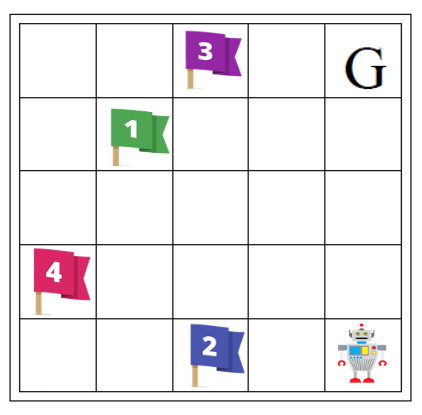



<h1><center>Figure 1: 5x5 Flags Domain</center></h1>

In each episode, the robot begins in the right lower corner. As illustrated in Figure 1, instead of a single
destination G, there are four different flags, numbered 1, 2, 3 and 4, that must be
collected in the correct order (first 1, then 2, etc... to 4). Once the robot has collected all the flags in the correct order and lands on cell G, the task is complete. If the robot collects the wrong flag at the wrong time (e.g. tries to collect 2 first, then 1...), the robot does not have to start over. Instead, the robot is penalized for taking this action, and the wrong flag is not collected (you may assume for training purposes, that the flags that have already been collected so far are kept). The main objective is to collect all the flags in the correct order in the least possible amount of time.

### 2. Problem modelling [15 Marks]

You are tasked with modelling the Flags environment. Then, you are asked to provide a programming description of the problem that will be used to solve it computationally using model-free reinforcement learning.

2.1.Answer the following questions:

(a) Define the state $(S)$ and action spaces $(A)$.[2 Marks]
$(S) = \{s_0, s_1, s_2, \dots, s_{24}\}$

$(A) = \{up, down, left, right\}$

(b) Construct a reward function ($R$) that aligns with the goal(s) you want your robot to achieve. [2 Marks]

We rewarded goal flags with 1, non-goal flags with -1, and -1 for each move.

**Flag 1**

| 0 | 0 | -1 | 0 | 0 |
|---|---|----|---|---|
| 0 | 1 | 0  | 0 | 0 |
| 0 | 0 | 0  | 0 | 0 |
| -1| 0 | 0  | 0 | 0 |
| 0 | 0 | -1 | 0 | 0 |

&nbsp;

**Flag 2**

| 0  | 0  | -1 | 0  | -1 |
|----|----|----|----|-----|
| 0  | 0  | 0  | 0  | 0  |
| 0  | 0  | 0  | 0  | 0  |
| -1 | 0  | 0  | 0  | 0  |
| 0  | 0  | 1  | 0  | 0  |

&nbsp;

**Flag 3**

| 0 | 0 | 1  | 0 | -1 |
|---|---|----|---|----|
| 0 | 0 | 0  | 0 | 0  |
| 0 | 0 | 0  | 0 | 0  |
| -1| 0 | 0  | 0 | 0  |
| 0 | 0 | 0  | 0 | 0  |

&nbsp;

**Flag 4**

| 0 | 0 | 0 | 0 | -1 |
|---|---|---|---|----|
| 0 | 0 | 0 | 0 | 0  |
| 0 | 0 | 0 | 0 | 0  |
| 1 | 0 | 0 | 0 | 0  |
| 0 | 0 | 0 | 0 | 0  |

&nbsp;

**Goal State**

| 0 | 0 | 0 | 0 | 1 |
|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 |


(c) Based on Figure 1, what is an optimal policy for this problem? You may explain your policy by drawing Figure 1 and trace the path the robot should take. Is there more than one optimal policy?[3 Marks]

It is possible to have more than one policy. This is because there is not just one path to the goal flag.
Here's an illustration of a possible policy and an example path.

<img src="https://github.com/user-attachments/assets/6478a138-f25c-4be8-83a0-fa01909c0867" width="400"/>

<img src="https://github.com/user-attachments/assets/da5a0d86-6df9-465c-8ada-6fc5420fa21a" width="400"/>

<img src="https://github.com/user-attachments/assets/cd9427d4-b49f-4eb0-9c1c-a2b0af6db14f" width="400"/>

<img src="https://github.com/user-attachments/assets/da5a0d86-6df9-465c-8ada-6fc5420fa21a" width="400"/>

<img src="https://github.com/user-attachments/assets/efff1649-9162-4d8f-a8e8-3712c13f6a20" width="400"/>



2.2 Implement the dynamics of the Flags environment. [8 Marks]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FLAG = 1
WRONG_FLAG = -1
OTHER = 0

class Flags:
    def __init__(self):
        self.directions = ['up', 'left', 'down','right']
        self.reward = [0]*5

        self.reward[0] = [
           OTHER, OTHER, WRONG_FLAG, OTHER, OTHER,
           OTHER, FLAG, OTHER, OTHER, OTHER,
           OTHER, OTHER, OTHER, OTHER, OTHER,
           WRONG_FLAG, OTHER, OTHER, OTHER, OTHER,
           OTHER, OTHER, WRONG_FLAG, OTHER, OTHER
        ]
        self.reward[1] = [
           OTHER, OTHER, WRONG_FLAG, OTHER, WRONG_FLAG,
           OTHER, OTHER, OTHER, OTHER, OTHER,
           OTHER, OTHER, OTHER, OTHER, OTHER,
           WRONG_FLAG, OTHER, OTHER, OTHER, OTHER,
           OTHER, OTHER, FLAG, OTHER, OTHER
        ]
        self.reward[2] = [
           OTHER, OTHER, FLAG, OTHER, WRONG_FLAG,
           OTHER, OTHER, OTHER, OTHER, OTHER,
           OTHER, OTHER, OTHER, OTHER, OTHER,
           WRONG_FLAG, OTHER, OTHER, OTHER, OTHER,
           OTHER, OTHER, OTHER, OTHER, OTHER
        ]
        self.reward[3] = [
           OTHER, OTHER, OTHER, OTHER, WRONG_FLAG,
           OTHER, OTHER, OTHER, OTHER, OTHER,
           OTHER, OTHER, OTHER, OTHER, OTHER,
           FLAG, OTHER, OTHER, OTHER, OTHER,
           OTHER, OTHER, OTHER, OTHER, OTHER
        ]
        self.reward[4] = [
            OTHER, OTHER, OTHER, OTHER, FLAG,
            OTHER, OTHER, OTHER, OTHER, OTHER,
            OTHER, OTHER, OTHER, OTHER, OTHER,
            OTHER, OTHER, OTHER, OTHER, OTHER,
            OTHER, OTHER, OTHER, OTHER, OTHER
        ]

        self.flags_obtained = 0
        self.grid_size = 5  # 5X5

    # return the initial state ...
    def reset(self):
      self.flags_obtained = 0
      return (4,4)

    # return a list containing all the possible states in the environment
    def states_space(self):
      return [(r, c) for r in range(5) for c in range(5)]

    # return a list containing all the possible actions corresponding to the given state
    def actions_space(self, state):
      return [0, 1, 2, 3]


    # environment transition returns s' and r.
    def transition(self, state, action):
      row, col = state

      # unpdate row, col
      if action == 0:  # up
          new_row = row if (row == 0) else row - 1
          new_col = col
      elif action == 1: # left
          new_row = row
          new_col = col if (col == 0) else col - 1
      elif action == 2: # down
          new_row = row if (row == 4) else row + 1
          new_col = col
      elif action == 3: # right
          new_row = row
          new_col = col if (col == 4) else col + 1

      # compute the reward
      idx = new_row * self.grid_size + new_col
      next_reward = self.reward[self.flags_obtained][idx] - 1

      # check the flag
      if self.reward[self.flags_obtained][idx] > 0:
          self.flags_obtained += 1

      return (new_row, new_col), next_reward



### 3 Monte Carlo Method [35 Marks]

In this section, you are asked to implement Monte Carlo methods to solve the flags domain. Use a discount factor of
$\gamma= 0.99$ for all your experiments.Set the maximum length of each episode to 200 if the terminal state is not reached by this point, the episode ends.Training should proceed for a total of 2000 episodes.


3.1.Create a function $generate\_episode$ which takes as input a policy $\pi$ and the environment. This function should return the tuple of states, actions and rewards generated in an episode following $\pi$.    [5 Marks]

In [3]:
def generate_episode(policy, environment):
    state = environment.reset() # reset the environment

    # flags = []
    states = []
    actions = []
    rewards = []
    iteration = 0

    # max episode length
    for _ in range(200):
        action = policy(state)

        # record (S, A, R)
        states.append(state)
        actions.append(action)

        next_state, reward = environment.transition(state, action)
        rewards.append(reward)

        # update the state
        state = next_state

        # terminate state
        if environment.flags_obtained == 5 and next_state == (0,4):
            break

    return states, actions, rewards


3.2.Implement the first-visit Monte Carlo (for $\epsilon$-soft policies) control algorithm to find the approximate optimal
policy $\pi^*$. Test  $\epsilon=\{0.01, 0.1, 0.25\}$ and include plots in your report for each of these values. What is the best value of $\epsilon$? Why? For each $\epsilon$, did your algorithm converge at all? What was the final policy and
Q-values that you typically obtain (typically, as in the majority of the trials)? Does this correspond to an optimal policy? Visualize the learning process (for instance, change in Q for some state; or any other visualization) to support your claims.  [15 Marks]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [5]:
class MonteCarlo:
    def __init__(self, environment, gamma=0.99, epsilon=0.01, num_episodes=2000):
        self.environment = environment
        self.gamma = gamma
        self.epsilon = epsilon
        self.num_episodes = num_episodes

        # states: (r,c) 5x5 -> 25
        self.states_list = self.environment.states_space()
        self.actions_list = [0,1,2,3]
        self.n_actions = len(self.actions_list)

        self.state2idx = {}
        for i, s in enumerate(self.states_list):
            self.state2idx[s] = i

        self.Q = {}
        self.returns = defaultdict(list)
        self.policy = None

        self.initialize_Q()
        self.policy = self.initialize_policy(self.states_list, self.actions_list, self.epsilon, self.state2idx)

        self.total_rewards_history = []
        self.episode_length_history = []
        self.max_q_value_change = []

        self.Q_records = defaultdict(list)

    def initialize_Q(self):
        for flag_num in range(5):
            for s_idx in range(len(self.states_list)):
                for a in range(self.n_actions):
                    self.Q[(flag_num, s_idx, a)] = 0.0

    def initialize_policy(self, states, actions, epsilon, state2idx):
        n_actions = len(actions)
        policy = []
        for flag_num in range(5):
            flag_policy = []
            for _ in range(len(states)):
                action_prob = np.ones(n_actions) * (epsilon / n_actions)
                best_action = np.random.choice(n_actions)
                action_prob[best_action] += (1 - epsilon)
                action_prob /= action_prob.sum()
                flag_policy.append(action_prob)
            policy.append(flag_policy)
        return policy

    def get_action_from_policy(self, flag_num, state_idx):
        probs = self.policy[flag_num][state_idx]
        action = np.random.choice(self.n_actions, p=probs)
        return action

    def update_policy(self, flag_num, state_idx):
        best_action = None
        best_q = float('-inf')
        for a in range(self.n_actions):
            q_val = self.Q[(flag_num, state_idx, a)]
            if q_val > best_q:
                best_q = q_val
                best_action = a

        new_probs = np.ones(self.n_actions) * (self.epsilon / self.n_actions)
        new_probs[best_action] += (1 - self.epsilon)
        new_probs /= new_probs.sum()

        self.policy[flag_num][state_idx] = new_probs

    def generate_episode_with_table(self):
        state = self.environment.reset()
        states = []
        actions = []
        rewards = []
        self.flags_at_time = []

        for _ in range(200):
            f = self.environment.flags_obtained
            s_idx = self.state2idx[state]
            action = np.random.choice(self.n_actions, p=self.policy[f][s_idx])

            states.append(state)
            actions.append(action)
            self.flags_at_time.append(f)

            next_state, reward = self.environment.transition(state, action)
            rewards.append(reward)

            state = next_state
            if self.environment.flags_obtained==5 and state==(0,4):
                break

        return states, actions, rewards

    def first_visit_mc_control(self):
        sampled_q_value = [[], [], [], [], []]
        for episode_i in range(self.num_episodes):

            for f in range(5):
                sampled_q_value[f].append([self.Q[(f, self.state2idx[(2,2)], i)] for i in self.actions_list ])

            Q_old = self.Q.copy()
            states, actions, rewards = self.generate_episode_with_table()

            G = 0.0
            visited = set()

            old_f = self.flags_at_time[-1]
            for t in reversed(range(len(states))):

                f = self.flags_at_time[t]
                if old_f != f:
                    G = 0.0
                old_f = f
                G = self.gamma * G + rewards[t]
                s = states[t]
                a = actions[t]

                steps_at_same_flag = [(states[i], actions[i]) for i in range(t) if self.flags_at_time[i] == f]
                if (s,a) not in list(steps_at_same_flag):
                    visited.add((f, s, a))
                    s_idx = self.state2idx[s]
                    self.returns[(f, s_idx, a)].append(G)
                    self.Q[(f, s_idx, a)] = np.mean(self.returns[(f, s_idx, a)])
                    self.update_policy(f, s_idx)


            ep_return = sum(rewards)
            self.total_rewards_history.append(ep_return)
            self.episode_length_history.append(len(states))
            self.max_q_value_change.append(
                max(abs(self.Q[s] - Q_old[s]) for s in self.Q.keys())
            )
        self.Q_records = sampled_q_value

    def inference(self):
        state = self.environment.reset()
        total_reward = 0
        total_iter = 0

        while True:
            total_iter += 1
            f = self.environment.flags_obtained
            s_idx = self.state2idx[state]

            best_q = float('-inf')
            best_action = None
            for a in range(self.n_actions):
                q_val = self.Q[(f, s_idx, a)]
                if q_val > best_q:
                    best_q = q_val
                    best_action = a

            next_state, reward = self.environment.transition(state, best_action)
            total_reward += reward
            state = next_state

            # 종료 조건
            if self.environment.flags_obtained == 5 and state == (0,4):
                break
            if total_iter >= 200:
                break

        print("====Result==")
        print(f"Take {total_iter} for the goal")
        print(f"Total reward {total_reward}")

    def print_final_policy(self):
        action_symbols = {0:'↑', 1:'←', 2:'↓', 3:'→'}
        for flag_num in range(5):
            print(f"\nPolicy after flag={flag_num} step:")
            grid_display = []
            for r in range(5):
                row_display = []
                for c in range(5):
                    s_idx = self.state2idx[(r,c)]
                    probs = self.policy[flag_num][s_idx]
                    best_a = np.argmax(probs)
                    row_display.append(action_symbols[best_a])
                grid_display.append(row_display)

            for row_disp in grid_display:
                print(' '.join(row_disp))


def visualize_sample_q_value(sample_q):
    fig, axes = plt.subplots(5, 4, figsize=(16, 12), sharex=True, sharey=True)

    action_symbols = {0: '↑', 1: '←', 2: '↓', 3: '→'}
    for i in range(5):
        for action in range(4):
            ax = axes[i, action]
            ax.plot(sample_q[i, :, action])
            ax.set_title(f"Q-Value in stage {i}, Action {action_symbols[action]}")
            ax.set_xlabel("Time Steps")
            ax.set_ylabel("Q-Value")

    plt.tight_layout()
    plt.show()


$\epsilon=0.01$

In [6]:
# 0.01
mc_eps_001 = MonteCarlo(environment=Flags(), gamma=0.99, epsilon=0.01, num_episodes=2000)

states = mc_eps_001.environment.states_space()
actions = [0, 1, 2, 3]
epsilon =  mc_eps_001.epsilon
mc_eps_001.first_visit_mc_control()

print("=== epsilon=0.01 ===")
print("Total Rewards History:", mc_eps_001.total_rewards_history)
print("Episode Length History:", mc_eps_001.episode_length_history)

mc_eps_001.print_final_policy()
mc_eps_001.inference()

=== epsilon=0.01 ===
Total Rewards History: [-266, -218, -201, -200, -200, -359, -200, -200, -264, -200, -201, -200, -200, -200, -200, -200, -200, -200, -201, -200, -200, -200, -202, -200, -200, -200, -200, -200, -225, -200, -200, -279, -199, -199, -199, -385, -199, -199, -200, -199, -199, -199, -199, -200, -294, -199, -237, -199, -199, -199, -199, -207, -199, -199, -199, -199, -199, -199, -199, -199, -199, -199, -199, -199, -199, -199, -200, -199, -199, -199, -289, -199, -199, -199, -201, -199, -199, -201, -198, -199, -199, -199, -199, -199, -199, -199, -199, -200, -208, -289, -198, -200, -197, -198, -198, -197, -197, -197, -197, -197, -289, -197, -197, -197, -197, -197, -197, -197, -196, -197, -197, -196, -196, -196, -196, -196, -196, -196, -196, -196, -196, -196, -196, -196, -196, -196, -196, -23, -196, -196, -196, -196, -196, -196, -196, -196, -196, -196, -23, -23, -23, -25, -23, -23, -23, -23, -23, -23, -197, -23, -23, -23, -25, -23, -23, -23, -23, -23, -23, -23, -23, -23, -198, -

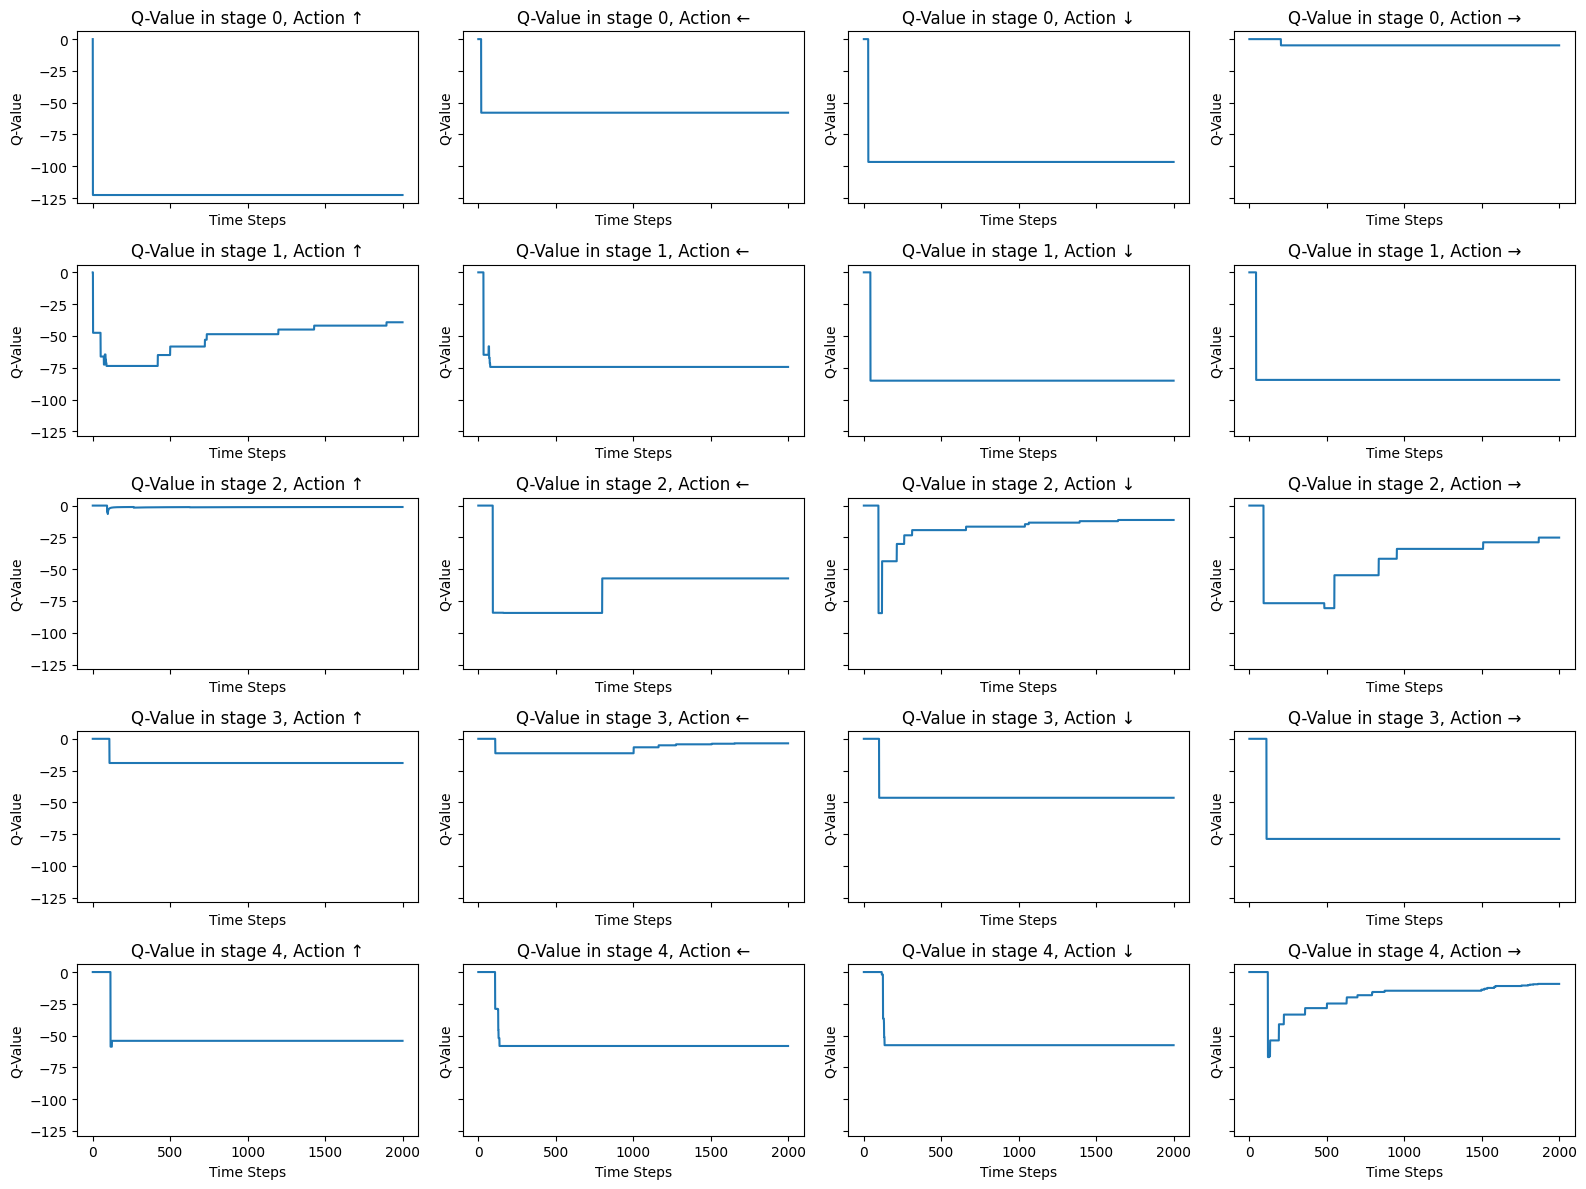

In [7]:
visualize_sample_q_value(np.array(mc_eps_001.Q_records))

$\epsilon=0.1$

In [8]:
# 0.1
mc_eps_01 = MonteCarlo(environment=Flags(), gamma=0.99, epsilon=0.1, num_episodes=2000)

states = mc_eps_01.environment.states_space()
actions = [0, 1, 2, 3]
epsilon = mc_eps_01.epsilon

mc_eps_01.first_visit_mc_control()

print("=== epsilon=0.1 ===")
print("Total Rewards History:", mc_eps_01.total_rewards_history)
print("Episode Length History:", mc_eps_01.episode_length_history)

mc_eps_01.print_final_policy()
mc_eps_01.inference()

=== epsilon=0.1 ===
Total Rewards History: [-203, -237, -203, -279, -259, -222, -250, -201, -200, -226, -200, -202, -199, -200, -212, -199, -199, -202, -199, -197, -199, -198, -237, -210, -107, -199, -199, -200, -199, -198, -198, -198, -231, -198, -198, -46, -199, -56, -96, -62, -42, -64, -41, -44, -45, -39, -41, -92, -39, -44, -48, -37, -45, -36, -45, -197, -39, -37, -39, -33, -34, -28, -39, -34, -46, -38, -34, -36, -41, -37, -40, -39, -36, -29, -45, -35, -105, -53, -38, -44, -36, -44, -39, -33, -39, -70, -36, -39, -34, -36, -37, -35, -34, -41, -37, -37, -44, -34, -37, -37, -40, -38, -36, -49, -54, -35, -33, -33, -44, -36, -33, -35, -57, -42, -34, -39, -35, -40, -35, -44, -37, -39, -34, -37, -34, -37, -40, -47, -37, -37, -34, -35, -38, -37, -89, -35, -40, -37, -35, -28, -34, -44, -43, -38, -44, -33, -45, -70, -40, -40, -41, -37, -33, -37, -36, -37, -30, -38, -35, -34, -89, -34, -35, -35, -35, -39, -35, -37, -38, -32, -35, -35, -43, -32, -38, -110, -33, -33, -33, -31, -39, -43, -32, -6

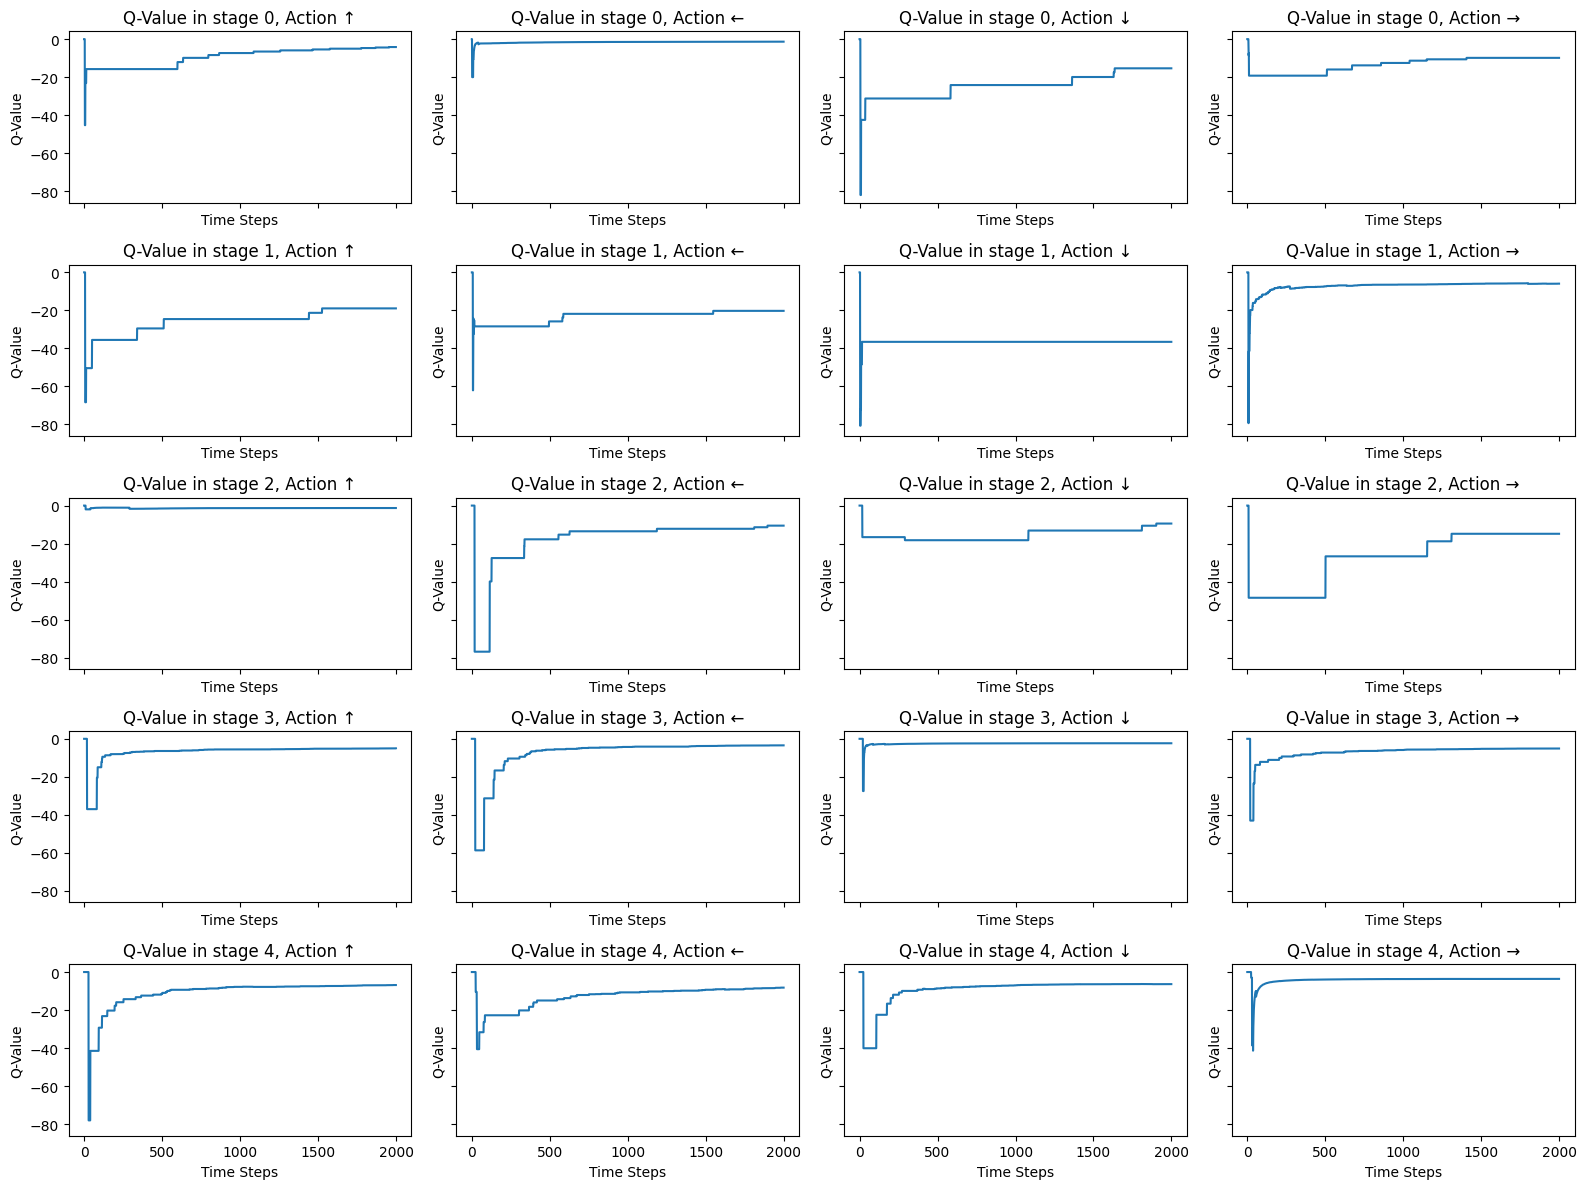

In [9]:
visualize_sample_q_value(np.array(mc_eps_01.Q_records))

$\epsilon=0.25$

In [10]:
# 0.25
mc_eps_025 = MonteCarlo(environment=Flags(), gamma=0.99, epsilon=0.25, num_episodes=2000)

states = mc_eps_025.environment.states_space()
actions = [0, 1, 2, 3]
epsilon = mc_eps_025.epsilon

mc_eps_025.first_visit_mc_control()

print("=== epsilon=0.25 ===")
print("Total Rewards History:", mc_eps_025.total_rewards_history)
print("Episode Length History:", mc_eps_025.episode_length_history)

mc_eps_025.print_final_policy()
mc_eps_025.inference()

=== epsilon=0.25 ===
Total Rewards History: [-234, -211, -203, -263, -240, -209, -207, -233, -199, -210, -203, -217, -203, -207, -117, -202, -199, -180, -199, -198, -199, -197, -135, -102, -55, -57, -35, -37, -37, -66, -49, -36, -35, -42, -65, -85, -38, -61, -57, -30, -52, -44, -24, -31, -104, -43, -43, -41, -32, -78, -49, -39, -37, -32, -42, -41, -43, -49, -29, -38, -38, -38, -37, -40, -42, -33, -57, -41, -32, -49, -46, -33, -47, -45, -43, -60, -44, -46, -63, -44, -38, -38, -66, -54, -34, -50, -82, -33, -75, -30, -31, -38, -68, -30, -88, -33, -28, -47, -58, -39, -54, -29, -35, -35, -45, -36, -40, -39, -43, -68, -33, -38, -35, -29, -77, -37, -38, -52, -25, -28, -22, -53, -25, -27, -31, -26, -37, -51, -26, -35, -30, -33, -25, -30, -31, -24, -30, -32, -23, -24, -26, -54, -43, -39, -27, -39, -54, -51, -34, -33, -29, -26, -29, -28, -32, -60, -41, -45, -28, -28, -27, -30, -74, -34, -37, -27, -38, -37, -50, -41, -49, -29, -37, -28, -28, -29, -100, -33, -38, -37, -26, -36, -31, -25, -35, -41,

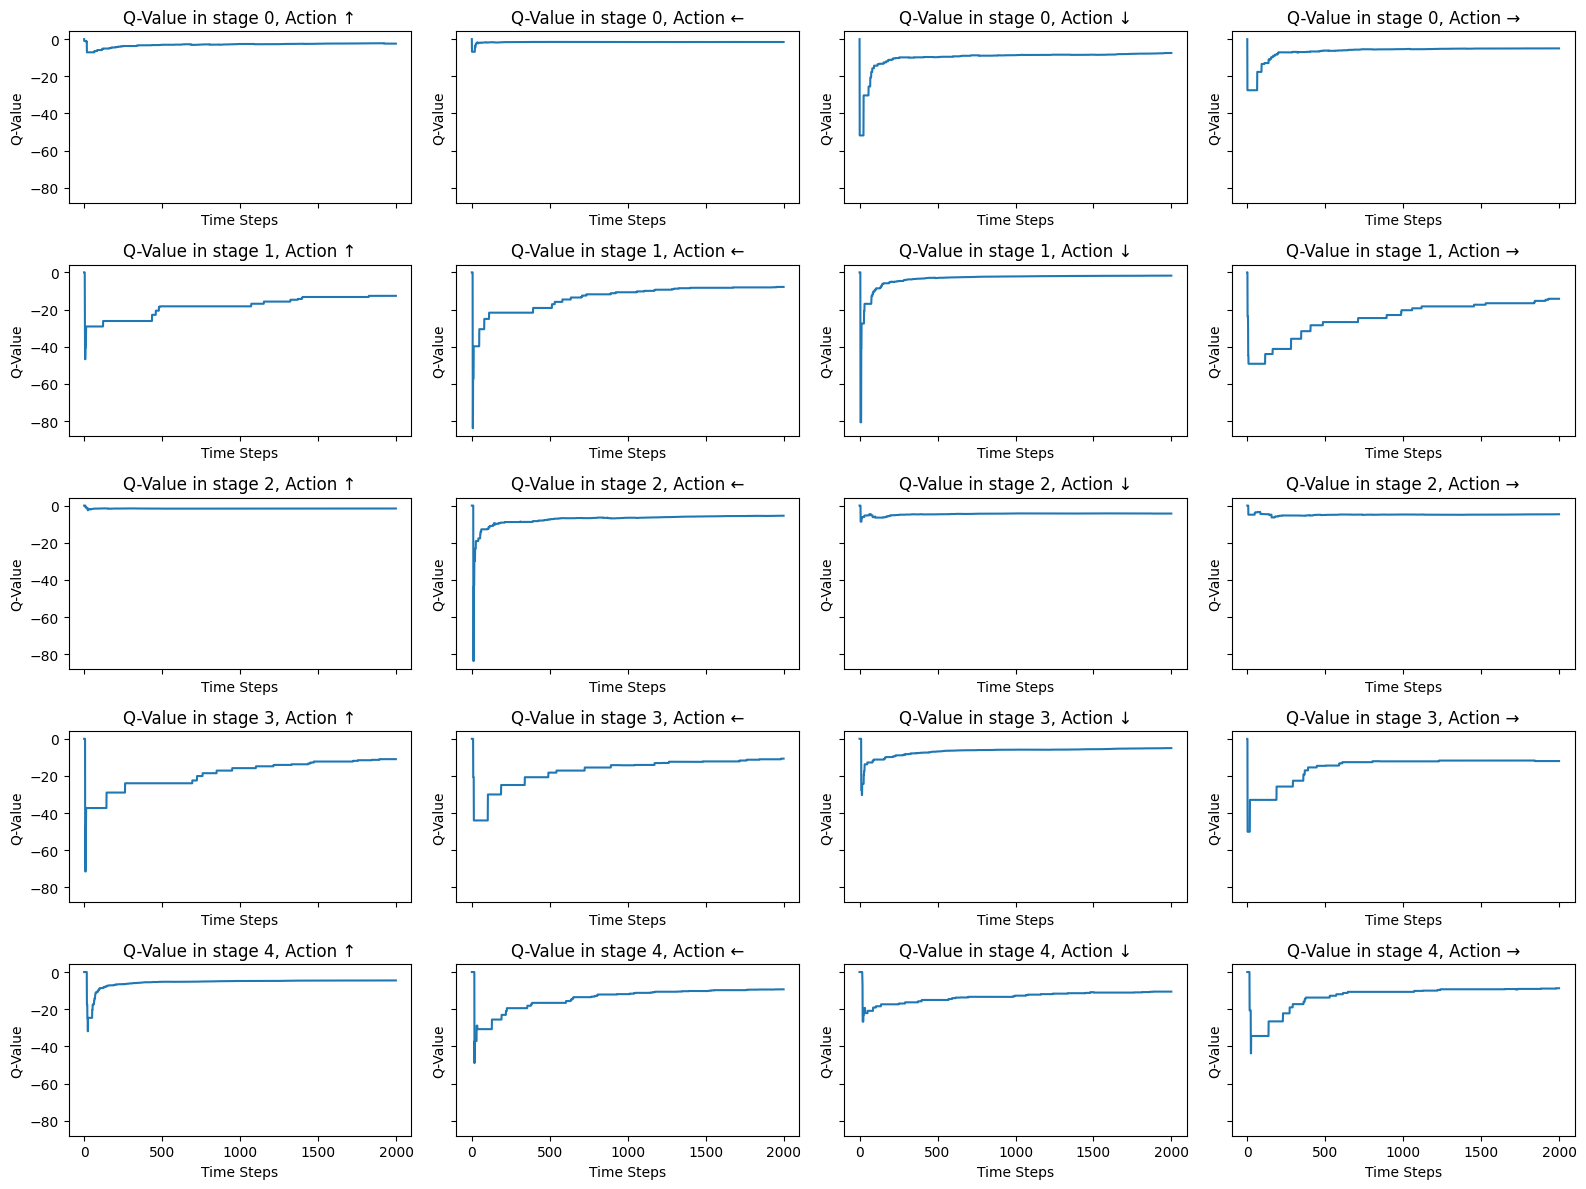

In [11]:
visualize_sample_q_value(np.array(mc_eps_025.Q_records))

Overall visualization

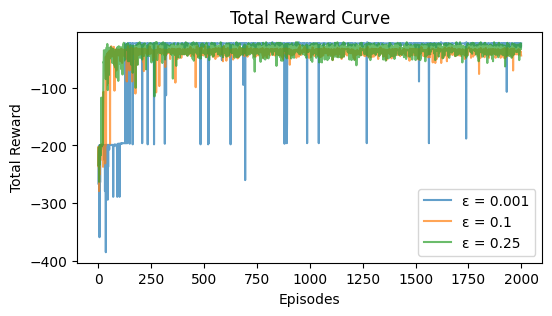

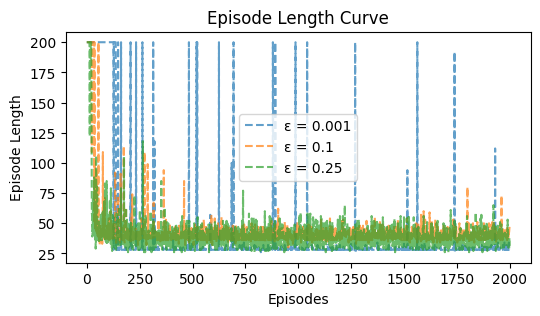

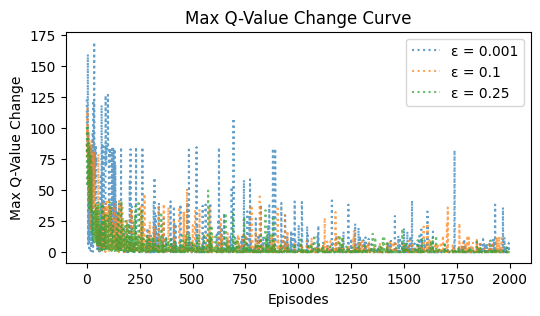

In [12]:
def plot_learning_curves(rewards_list, lengths_list, max_qvalues_list, epsilons):
    x_size = 6
    y_size = 3

    # Total Reward Curve
    plt.figure(figsize=(x_size, y_size))
    for rewards, epsilon in zip(rewards_list, epsilons):
        plt.plot(rewards, label=f"ε = {epsilon}", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title("Total Reward Curve")
    plt.legend()
    plt.show()

    # Episode Length Curve
    plt.figure(figsize=(x_size, y_size))
    for lengths, epsilon in zip(lengths_list, epsilons):
        plt.plot(lengths, label=f"ε = {epsilon}", linestyle="dashed", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Episode Length")
    plt.title("Episode Length Curve")
    plt.legend()
    plt.show()

    # Max Q-Value Change Curve
    plt.figure(figsize=(x_size, y_size))
    for max_qvalues, epsilon in zip(max_qvalues_list, epsilons):
        plt.plot(max_qvalues, label=f"ε = {epsilon}", linestyle="dotted", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Max Q-Value Change")
    plt.title("Max Q-Value Change Curve")
    plt.legend()
    plt.show()

rewards_list = [mc_eps_001.total_rewards_history, mc_eps_01.total_rewards_history, mc_eps_025.total_rewards_history]
length_list = [mc_eps_001.episode_length_history, mc_eps_01.episode_length_history, mc_eps_025.episode_length_history]
max_q_list = [mc_eps_001.max_q_value_change, mc_eps_01.max_q_value_change, mc_eps_025.max_q_value_change]
eps_list = [0.001, 0.1, 0.25]


plot_learning_curves(rewards_list, length_list, max_q_list, eps_list)

In this experiment, epsilon = 0.25 proved to be the best choice. When epsilon = 0.01, insufficient exploration caused most episodes to use up the full 200 steps while accumulating significant negative rewards. Although epsilon = 0.1 showed some improvement, it still fell short of converging to the optimal policy. In contrast, epsilon = 0.25 provided enough exploration to visit a wide range of state–action pairs and learn higher-reward paths, ultimately converging to an optimal (or near-optimal) policy that collects all flags in order and reaches the goal.

Looking at the episode-by-episode changes in the maximum Q-value, all epsilon values did exhibit a convergence trend over time, but with epsilon = 0.01, learning progressed more slowly due to the very low exploration rate, whereas epsilon = 0.25 achieved the fastest convergence and best policy quality. Furthermore, visualizing the Q-values for a specific state such as (2,2) revealed that with epsilon = 0.25, the Q-values at each stage gradually improved so that actions favorable for reaching the goal attained high values.

In conclusion, under epsilon = 0.25, the final policy efficiently collected all flags in sequence and reached the goal, demonstrating that it was effectively optimal. The other epsilon values (0.01 and 0.1) suffered from either too little or somewhat insufficient exploration and consequently failed to reach the same level of optimality.

3.3.Consider a random behavior policy $b(a|s)=1/|A|$ for every state and action. Use episodes generated with $b$ to find the approximate optimal policy $\pi^*$. First use ordinary importance sampling Monte Carlo control. Then use weighted importance sampling Monte Carlo control. Answer the same questions as in 3.2.  [15 Marks]

In [13]:
class MonteCarlo_with_IS:
    def __init__(self, environment, gamma=0.99, num_episodes=2000):
        self.env = environment
        self.gamma = gamma
        self.num_episodes = num_episodes

        self.states_list = self.env.states_space()
        self.actions_list = self.env.actions_space(None)
        self.n_actions = len(self.actions_list)

        self.state2idx = {}
        for i, s in enumerate(self.states_list):
            self.state2idx[s] = i

        self.Q = defaultdict(float)
        self.Q_records = defaultdict(list)
        self.pi = {}

        self.episode_length_history = []
        self.total_rewards_history = []

        self.C = defaultdict(float)

        self.returns = defaultdict(list)

        self.episode_length_history = []
        self.total_rewards_history = []
        self.max_q_value_change = []

        self.weight_history_ois = []
        self.weight_history_wis = []

        # generate episodes with b
        self.behavior_probs = 1.0/self.n_actions

    def random_behavior_action(self, state):
        return np.random.choice(self.n_actions)

    def generate_episode_from_behavior(self):
        states, actions, rewards, flags = [], [], [], []

        state = self.env.reset()
        for t in range(200):
            s_idx = self.state2idx[state]
            f = self.env.flags_obtained

            # random action from b
            action = self.random_behavior_action(state)

            states.append(state)
            actions.append(action)
            flags.append(f)

            next_state, r = self.env.transition(state, action)
            rewards.append(r)

            state = next_state
            if (self.env.flags_obtained == 5 and state==(0,4)):
                # terminal
                break

        return states, actions, rewards, flags

    def get_pi_action(self, flag, state_idx):
        key_candidates = [(flag, state_idx, a) for a in range(self.n_actions)]
        qvals = [self.Q[k] for k in key_candidates]
        best_a = np.argmax(qvals)
        return best_a

    def ordinary_importance_sampling_control(self):

        sampled_q_value = [[], [], [], [], []]
        self.total_rewards_history = []
        self.episode_length_history = []

        for episode_i in range(self.num_episodes):

            for f in range(5):
                sampled_q_value[f].append([self.Q[(f, self.state2idx[(2,2)], i)] for i in self.actions_list ])
            Q_old = self.Q.copy()

            self.env.reset()
            states, actions, rewards, flags = self.generate_episode_from_behavior()

            # accumulate return
            G = 0.0
            W = 1.0
            T = len(states)

            visited = set()
            old_f = flags[-1]

            # Add max X monitoring
            max_w = 0.0

            for t in reversed(range(T)):

                ft = flags[t]
                if old_f != ft:
                    G = 0.0
                old_f = ft

                G = self.gamma * G + rewards[t]

                st = states[t]
                at = actions[t]

                st_idx = self.state2idx[st]

                # update Q
                best_a = self.get_pi_action(ft, st_idx)
                if at != best_a:
                    W = 0
                else:
                    W = W * (1.0 / self.behavior_probs)

                # Update max W
                if W > max_w:
                    max_w = W

                key = (ft, st_idx, at)

                n = len(self.returns[key]) + 1e-9
                old_q = self.Q[key]
                alpha = 1.0 / (n)  # naive averaging

                # update
                self.Q[key] = old_q + alpha * W * (G - old_q)
                self.returns[key].append(G)  # keep record

                if W == 0.0:
                    break

            # Record max W
            self.weight_history_ois.append(max_w)

            # After the episode, policy update
            for ft, st in zip(flags, states):
                st_idx = self.state2idx[st]
                # update pi
                best_a = np.argmax([
                    self.Q[(ft, st_idx, a)] for a in range(self.n_actions)
                ])
                self.pi[(ft, st_idx)] = best_a

            self.total_rewards_history.append(sum(rewards))
            self.episode_length_history.append(T)
            self.max_q_value_change.append(
                max(abs(self.Q[s] - Q_old[s]) for s in self.Q.keys())
            )

        self.Q_records = sampled_q_value

    def weighted_importance_sampling_control(self):

        sampled_q_value = [[], [], [], [], []]
        self.total_rewards_history = []
        self.episode_length_history = []

        for episode_i in range(self.num_episodes):
            for f in range(5):
                sampled_q_value[f].append([self.Q[(f, self.state2idx[(2,2)], i)] for i in self.actions_list ])
                Q_old = self.Q.copy()

            self.env.reset()
            states, actions, rewards, flags = self.generate_episode_from_behavior()

            G = 0.0
            W = 1.0
            T = len(states)

            old_f = flags[-1]

            # Add max X monitoring
            max_w = 0.0

            for t in reversed(range(T)):

                ft = flags[t]
                if old_f != ft:
                    G = 0.0
                old_f = ft

                G = self.gamma * G + rewards[t]

                st = states[t]
                at = actions[t]
                st_idx = self.state2idx[st]

                best_a = self.get_pi_action(ft, st_idx)
                if at != best_a:
                    W = 0
                    break
                else:
                    W = W*(1.0/self.behavior_probs)

                # Update max W
                if W > max_w:
                    max_w = W

                # weighted incremental update
                key = (ft, st_idx, at)
                self.C[key] += W

                old_q = self.Q[key]
                self.Q[key] = old_q + (W/self.C[key])*(G - old_q)
                self.Q_records[(ft, st, at)].append(self.Q[key])

            # Record max W
            self.weight_history_wis.append(max_w)

            # After the episode, greedy policy update
            for ft, st in zip(flags, states):
                st_idx = self.state2idx[st]
                best_a = np.argmax([
                    self.Q[(ft, st_idx, a)] for a in range(self.n_actions)
                ])
                self.pi[(ft, st_idx)] = best_a

            self.total_rewards_history.append(sum(rewards))
            self.episode_length_history.append(T)
            self.max_q_value_change.append(
                max(abs(self.Q[s] - Q_old[s]) for s in self.Q.keys())
            )
        self.Q_records = sampled_q_value

    def inference(self):
      state = self.env.reset()
      total_reward = 0
      total_iter = 0

      while True:
          total_iter += 1
          f = self.env.flags_obtained
          s_idx = self.state2idx[state]

          best_q = float('-inf')
          best_action = None
          for a in range(self.n_actions):
              q_val = self.Q[(f, s_idx, a)]
              if q_val > best_q:
                  best_q = q_val
                  best_action = a

          next_state, reward = self.env.transition(state, best_action)
          total_reward += reward
          state = next_state

          # teminate condition
          if (self.env.flags_obtained == 5 and state == (0,4)):
              break
          if total_iter >= 200:
              break

      print("====Result===")
      print(f"Take {total_iter} steps for the goal")
      print(f"Total reward: {total_reward}")


    def print_final_policy(self):
        action_symbols = {0:'↑', 1:'←', 2:'↓', 3:'→'}

        for flag_num in range(5):
            print(f"\n[Flag={flag_num}] Greedy Policy:")
            grid_display = []
            for r in range(5):
                row_display = []
                for c in range(5):
                    st_idx = self.state2idx[(r,c)]
                    # pi
                    if (flag_num, st_idx) not in self.pi:
                        row_display.append('?')
                    else:
                        a = self.pi[(flag_num, st_idx)]
                        row_display.append(action_symbols[a])
                grid_display.append(row_display)

            for row_disp in grid_display:
                print(' '.join(row_disp))


Ordinary importance sampling Monte Carlo control

In [59]:
from copy import deepcopy

environment = Flags()

# Ordinary Importance Sampling
mc_ois = MonteCarlo_with_IS(environment=environment, gamma=0.99, num_episodes=2000)
mc_ois.ordinary_importance_sampling_control()

print("=== [Ordinary Importance Sampling] total_rewards_history ===")
print(mc_ois.total_rewards_history)
print("=== [Ordinary Importance Sampling] episode_length_history ===")
print(mc_ois.episode_length_history)

mc_ois.inference()
mc_ois.print_final_policy()


=== [Ordinary Importance Sampling] total_rewards_history ===
[-226, -215, -182, -224, -232, -215, -220, -222, -207, -199, -229, -215, -205, -142, -228, -221, -210, -208, -207, -233, -227, -216, -219, -227, -212, -140, -225, -214, -236, -240, -210, -218, -177, -223, -241, -216, -215, -215, -214, -218, -218, -213, -206, -212, -212, -203, -216, -220, -233, -214, -211, -219, -161, -218, -175, -236, -214, -233, -209, -212, -235, -224, -167, -226, -233, -210, -208, -227, -226, -206, -224, -184, -232, -221, -210, -228, -214, -217, -237, -204, -220, -199, -215, -211, -205, -211, -206, -219, -208, -210, -220, -217, -213, -203, -234, -207, -211, -207, -203, -207, -202, -199, -239, -168, -214, -216, -227, -225, -225, -216, -207, -223, -234, -218, -220, -204, -211, -204, -212, -211, -208, -211, -219, -206, -221, -199, -215, -193, -206, -224, -211, -203, -223, -216, -151, -225, -238, -230, -208, -209, -216, -212, -222, -226, -241, -223, -226, -223, -208, -208, -166, -203, -227, -213, -228, -212, -2

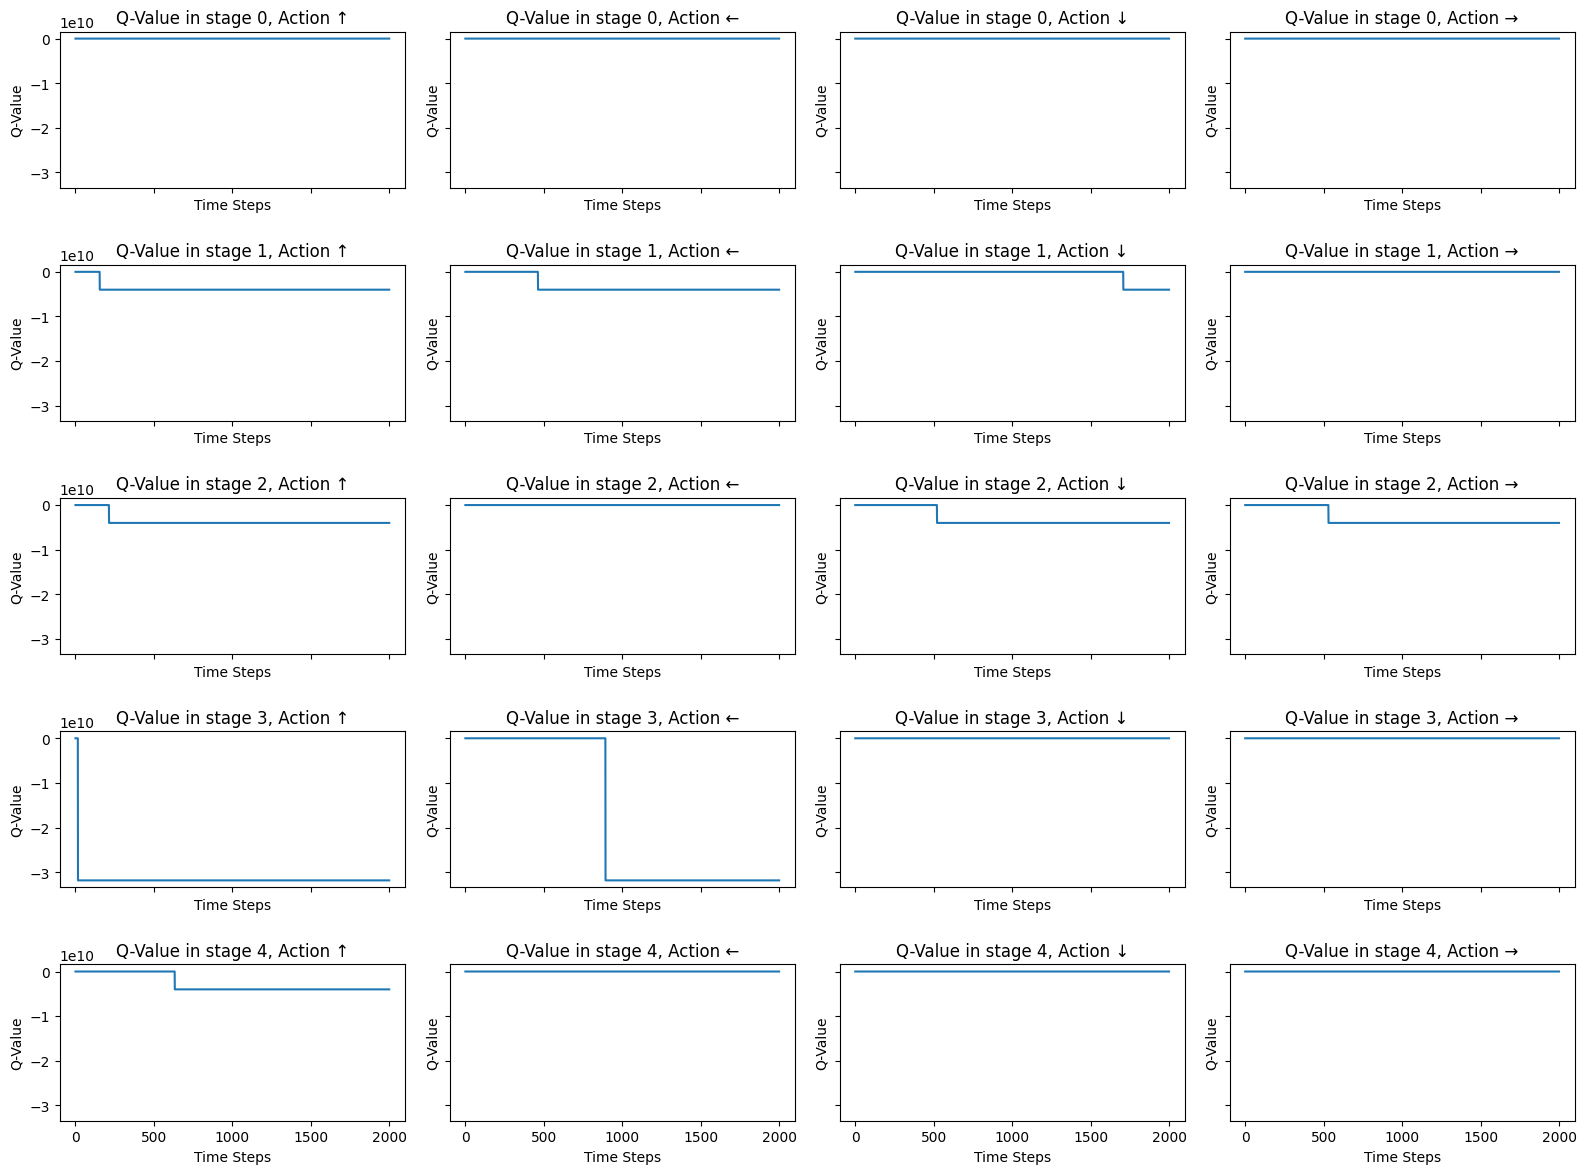

In [60]:
visualize_sample_q_value(np.array(mc_ois.Q_records))

Weighted importance sampling Monte Carlo control

In [84]:
# Weighted Importance Sampling
mc_wis = MonteCarlo_with_IS(environment=deepcopy(environment), gamma=0.99, num_episodes=2000)
mc_wis.weighted_importance_sampling_control()

print("=== [Weighted Importance Sampling] total_rewards_history ===")
print(mc_wis.total_rewards_history)
print("=== [Weighted Importance Sampling] episode_length_history ===")
print(mc_wis.episode_length_history)

mc_wis.inference()
mc_wis.print_final_policy()

=== [Weighted Importance Sampling] total_rewards_history ===
[-216, -209, -200, -207, -201, -221, -238, -218, -206, -215, -207, -210, -214, -212, -209, -224, -217, -222, -228, -216, -208, -229, -226, -226, -222, -214, -226, -223, -225, -180, -244, -210, -217, -220, -179, -213, -213, -221, -212, -183, -230, -221, -210, -230, -203, -207, -205, -221, -222, -223, -223, -218, -218, -217, -230, -214, -205, -220, -160, -172, -224, -205, -231, -214, -216, -219, -201, -214, -235, -214, -217, -229, -223, -224, -227, -208, -218, -204, -229, -203, -218, -211, -208, -220, -220, -211, -213, -223, -164, -223, -221, -218, -111, -236, -211, -219, -210, -222, -212, -202, -221, -220, -217, -212, -210, -227, -228, -217, -211, -222, -206, -228, -203, -225, -244, -216, -243, -220, -202, -216, -217, -222, -217, -213, -214, -212, -213, -232, -217, -203, -230, -207, -218, -223, -209, -220, -223, -215, -223, -214, -207, -206, -230, -210, -119, -211, -224, -223, -217, -205, -212, -219, -238, -226, -224, -226, -2

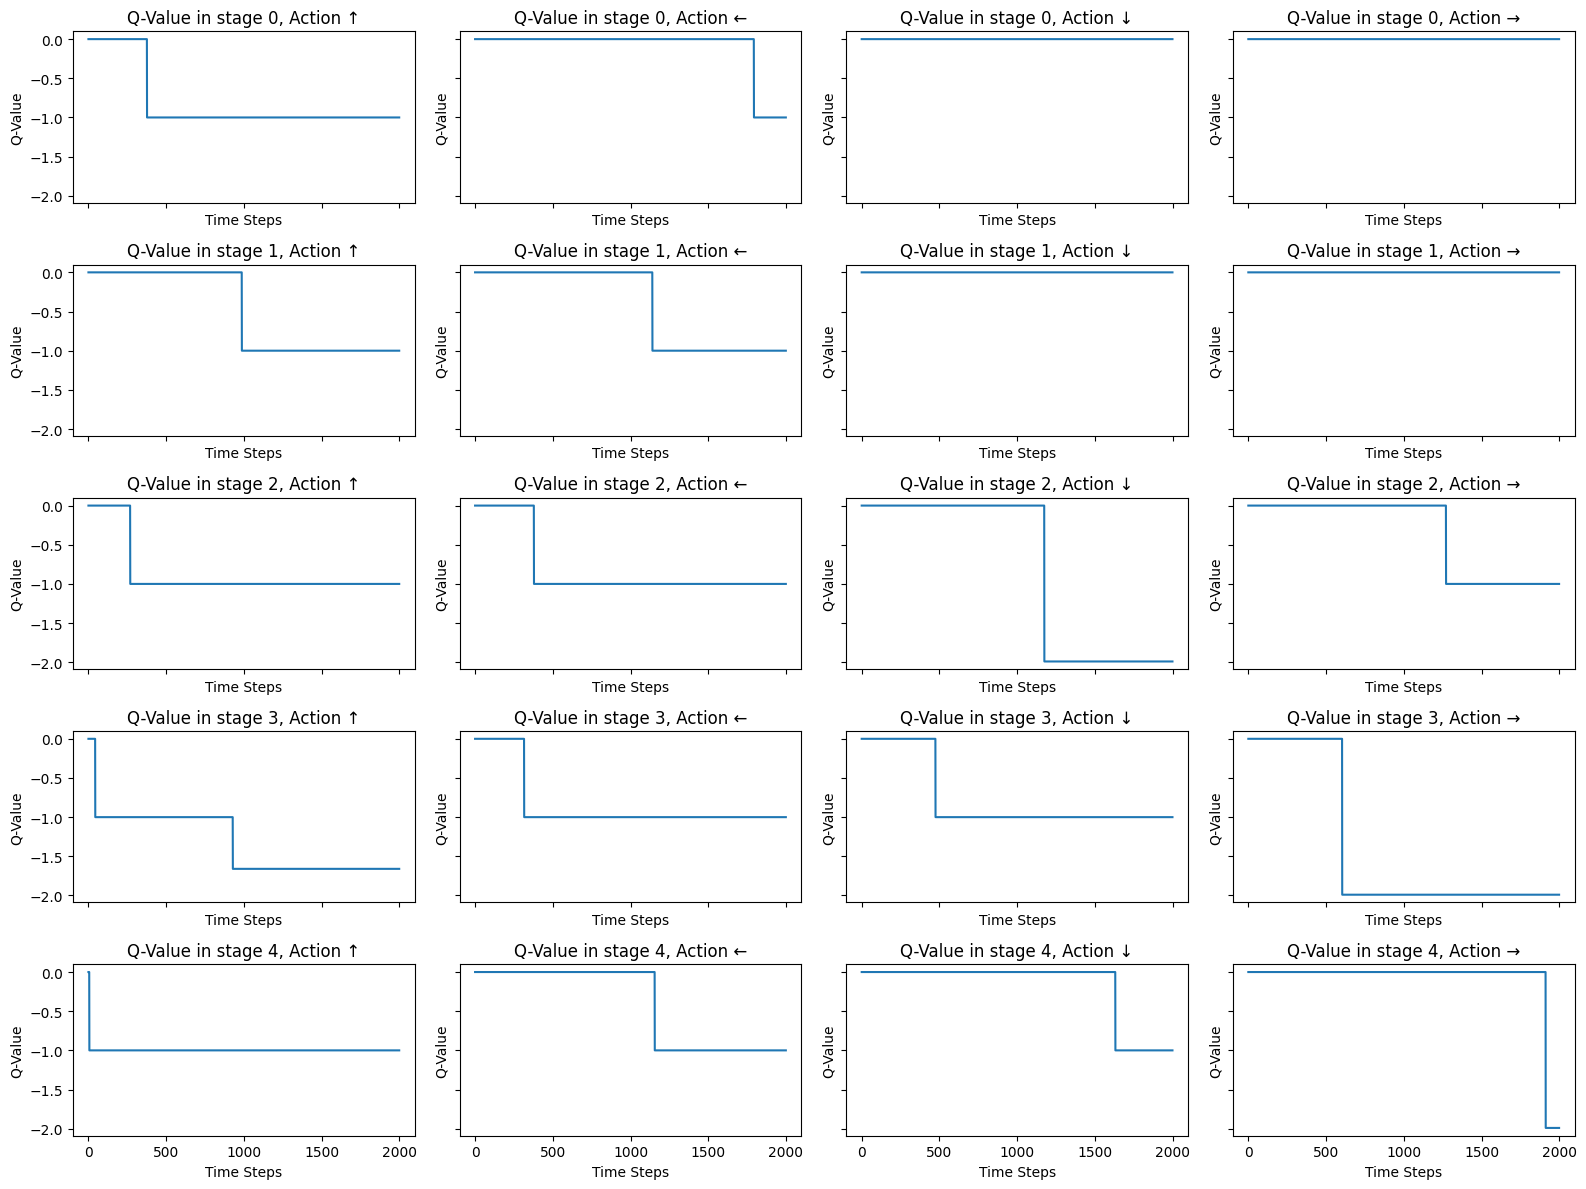

In [85]:
visualize_sample_q_value(np.array(mc_wis.Q_records))

Overall

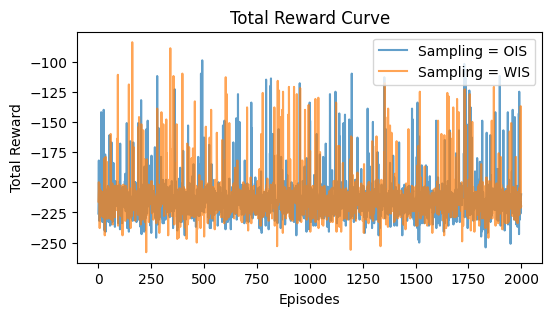

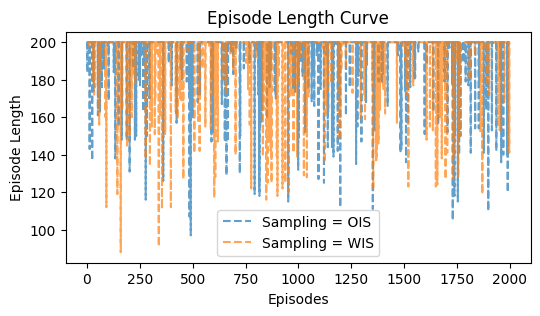

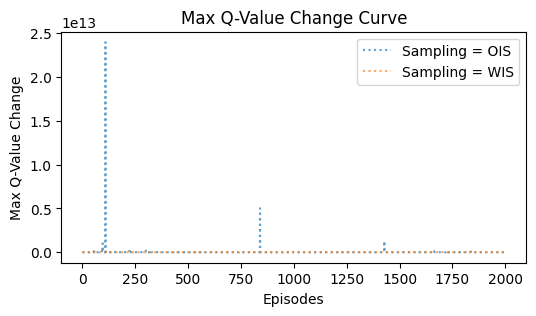

In [86]:
def plot_sampling_learning_curves(rewards_list, lengths_list, max_qvalues_list, epsilons):
    x_size = 6
    y_size = 3

    # Total Reward Curve
    plt.figure(figsize=(x_size, y_size))
    for rewards, epsilon in zip(rewards_list, epsilons):
        plt.plot(rewards, label=f"Sampling = {epsilon}", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title("Total Reward Curve")
    plt.legend()
    plt.show()

    # Episode Length Curve
    plt.figure(figsize=(x_size, y_size))
    for lengths, epsilon in zip(lengths_list, epsilons):
        plt.plot(lengths, label=f"Sampling = {epsilon}", linestyle="dashed", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Episode Length")
    plt.title("Episode Length Curve")
    plt.legend()
    plt.show()

    # Max Q-Value Change Curve
    plt.figure(figsize=(x_size, y_size))
    for max_qvalues, epsilon in zip(max_qvalues_list, epsilons):
        plt.plot(max_qvalues, label=f"Sampling = {epsilon}", linestyle="dotted", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Max Q-Value Change")
    plt.title("Max Q-Value Change Curve")
    plt.legend()
    plt.show()

rewards_list = [mc_ois.total_rewards_history, mc_wis.total_rewards_history]
length_list = [mc_ois.episode_length_history, mc_wis.episode_length_history]
q_list = [mc_ois.max_q_value_change, mc_wis.max_q_value_change]
name_list = ['OIS', 'WIS']

plot_sampling_learning_curves(rewards_list, length_list, q_list, name_list)

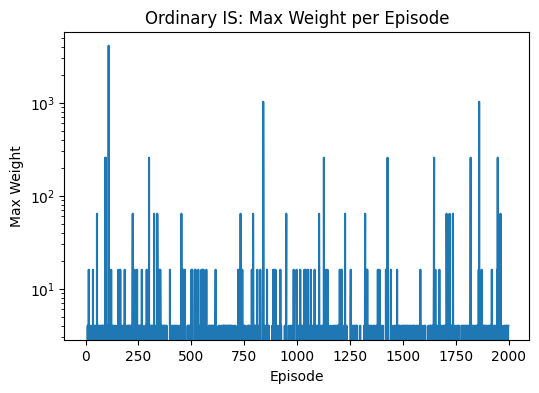

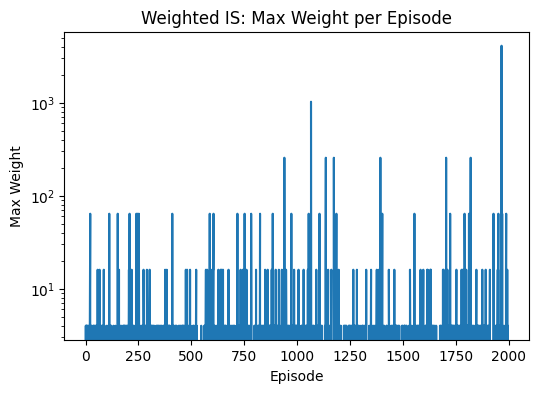

In [87]:
plt.figure(figsize=(6,4))
plt.plot(mc_ois.weight_history_ois, label="Max Weight (OIS)")
plt.title("Ordinary IS: Max Weight per Episode")
plt.xlabel("Episode")
plt.ylabel("Max Weight")
plt.yscale("log")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(mc_wis.weight_history_wis, label="Max Weight (WIS)")
plt.title("Weighted IS: Max Weight per Episode")
plt.xlabel("Episode")
plt.ylabel("Max Weight")
plt.yscale("log")
plt.show()

We can see that both algorithms using ordinary importance sampling and weighted importance sampling fail to converge. As shown in the figures, many episodes reach the maximum length of 200 steps or remain in a high negative reward range, without ever reaching the terminal state. This indicates that the agent fails to learn sufficiently good state-action pairs, causing large variance in the Q-values and ultimately preventing convergence to an optimal policy.

We think these results exemplify the well-known "exponential growth of importance sampling weights" problem often observed in off-policy learning. If there is a large discrepancy between the target policy pi and the behavior policy b, then the importance sampling ratio can become very large at each time step (since b is uniform), and these ratios multiply over the course of an episode. As a result, the overall weight W can grow exponentially. This leads to unstable and excessively large updates to the Q-values, which in turn prevents the learning process from converging.

We conducted visualizations based on the above evidence. The results showed that the weights increased exponentially for both OIS and WIS, with the magnitude and frequency of these increases being particularly severe in OIS.

### 4 Temporal Diference Control Methods [25 Marks]

In this section, you are asked to implement SARSA and Q-learning methods to solve the flags domain. Use a discount factor of $\gamma= 0.99$ and a learning rate of $\alpha = 0.3$ for all your experiments.Set the maximum length of each episode to 200 if the terminal state is not reached by this point.Training should proceed for a total of 500 episodes.

4.1. Implement the off-policy Q-learning algorithm as discussed in class. Test  $\epsilon=\{0.01, 0.1, 0.25\}$ and  answer the same questions as in 3.2. [13 Marks]

<!-- Test  $\epsilon=\{0.01, 0.1, 0.25\}$ and include plots in your report for each of these values.
What is the best value of $\epsilon$? Why?
1. 최종 value 계산
2. 수렴 속도 계산
For each $\epsilon$, did your algorithm converge at al?
1. Convergense 속도
What was the final policy and
Q-values that you typically obtain (typically, as in the majority of the trials)? Does this correspond to an optimal policy?

Visualize the learning process (for instance, change in Q for some state; or any other visualization) to support your claims.  [15 Marks] -->

In [88]:
import random

sampled_x = 2
sampled_y = 2

class QLearning:
    def __init__(self, env, eps, gamma=0.99, alpha=0.3, num_episodes=500):
        self.env = env
        self.eps = eps
        self.gamma = gamma
        self.alpha = alpha
        self.num_episodes = num_episodes
        self.action_symbols = {0: '↑', 1: '←', 2: '↓', 3: '→'}

        self.Q = None


    def off_policy(self):

        Q = np.zeros((5, 5, 5, 4))
        rewards_per_episode = []
        length_per_episode = []
        max_q_changes = []
        sampled_q_value = [[], [], [], [], []]
        for n in range(self.num_episodes):
            state = self.env.reset()

            total_length = None
            total_reward = 0
            old_Q = Q.copy()

            for f in range(len(Q)):
                sampled_q_value[f].append(np.copy(Q[f][2][2]))

            for i in range(200):
                row, col = state

                # epsilon-greedy
                if random.uniform(0, 1) < self.eps:
                    action = random.choice(self.env.actions_space(state))  # Explore
                else:
                    action = np.argmax(Q[self.env.flags_obtained,row, col])

                old_flags_obtained = self.env.flags_obtained
                next_state, reward = self.env.transition(state, action)
                next_row, next_col = next_state

                total_reward += reward

                if self.env.flags_obtained >= 5:
                    Q[old_flags_obtained, row, col, action] += self.alpha * (reward)
                    total_length = i
                    break
                else:
                    Q[old_flags_obtained, row, col, action] += self.alpha * (reward +
                    self.gamma * np.max(Q[old_flags_obtained, next_row, next_col]) - Q[old_flags_obtained, row, col, action])

                state = next_state

            total_length = 200 if total_length == None else total_length
            length_per_episode.append(total_length)
            rewards_per_episode.append(total_reward)

            max_change = np.max(np.abs(Q - old_Q))
            max_q_changes.append(max_change)


        self.Q = Q
        return rewards_per_episode, length_per_episode, max_q_changes, sampled_q_value

    def inference(self):
        state = self.env.reset()
        total_reward = 0
        total_iter = 0

        while True:
            total_iter += 1
            row, col = state
            action = np.argmax(self.Q[self.env.flags_obtained,row, col])
            next_state, reward = self.env.transition(state, action)
            state = next_state

            total_reward += reward

            if self.env.flags_obtained >= 5:
                break

        print("====Result===")
        print(f"Take {total_iter} for the goal")
        print(f"Total reward {total_reward}")

    def print_final_policy(self):
        print(f"\nFinal Policy for ε = {self.eps}:")

        for f in range(5):
            grid_display = []
            print(f"policy in stage {f}")
            for r in range(5):
                row_display = []
                for c in range(5):
                    best_action = np.argmax(self.Q[f, r, c])  # Choose best action based on Q-values
                    row_display.append(self.action_symbols[best_action])
                grid_display.append(row_display)

            for row_disp in grid_display:
                print(' '.join(row_disp))

def plot_learning_curve(rewards, lengths, max_qvalues, epsilon):
    x_size = 6
    y_size = 3
    plt.figure(figsize=(x_size, y_size))
    plt.plot(rewards, label="Total Reward", color="tab:blue", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title(f"Total Reward Curve for ε = {epsilon}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(x_size, y_size))
    plt.plot(lengths, label="Episode Length", color="tab:orange", linestyle="dashed", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Episode Length")
    plt.title(f"Episode Length Curve for ε = {epsilon}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(x_size, y_size))
    plt.plot(max_qvalues, label="Max Q-Value Change", color="tab:green", linestyle="dotted", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Max Q-Value Change")
    plt.title(f"Max Q-Value Change Curve for ε = {epsilon}")
    plt.legend()
    plt.show()

def visualize_sample_q_value(sample_q):
    fig, axes = plt.subplots(5, 4, figsize=(16, 12), sharex=True, sharey=True)

    action_symbols = {0: '↑', 1: '←', 2: '↓', 3: '→'}
    for i in range(5):
        for action in range(4):
            ax = axes[i, action]
            ax.plot(sample_q[i, :, action])
            ax.set_title(f"Q-Value in stage {i}, Action {action_symbols[action]}")
            ax.set_xlabel("Time Steps")
            ax.set_ylabel("Q-Value")

            # ax.set_ylim(0, 20)

    plt.tight_layout()
    plt.show()


In [89]:
env = Flags()
q_025 = QLearning(env, eps=0.25)
rewards_per_episode_025, length_per_episode_025, max_q_changes_025, sampled_q_value_025 = q_025.off_policy()
q_025.print_final_policy()
q_025.inference()



Final Policy for ε = 0.25:
policy in stage 0
← ↓ ↓ ↓ ←
→ ↑ ← ← ←
→ ↑ ↑ ↑ ←
→ ↑ ↑ ← ↑
← ↑ ↑ ↑ ↑
policy in stage 1
← ↓ ↓ ↑ ↓
→ ↓ ↓ ← ↑
→ ↓ ↓ ← →
→ ↓ ↓ ← →
→ → ↑ ← ↓
policy in stage 2
→ → ↑ ← ←
→ ↑ ↑ ← ←
↓ → ↑ ↑ ↑
↑ → ↑ ↑ ←
← → ↑ ← ↑
policy in stage 3
↓ ← ↓ ↓ ↑
↓ ← ↓ ← ↑
↓ ← ↓ ← ←
↑ ← ← ← ←
↑ ↑ ↑ ↓ →
policy in stage 4
→ → → → ↑
↑ → → → ↑
↑ → ↑ ↑ ↑
↑ ↑ → ↑ ↑
↑ ↑ → → ↑
====Result===
Take 26 for the goal
Total reward -21


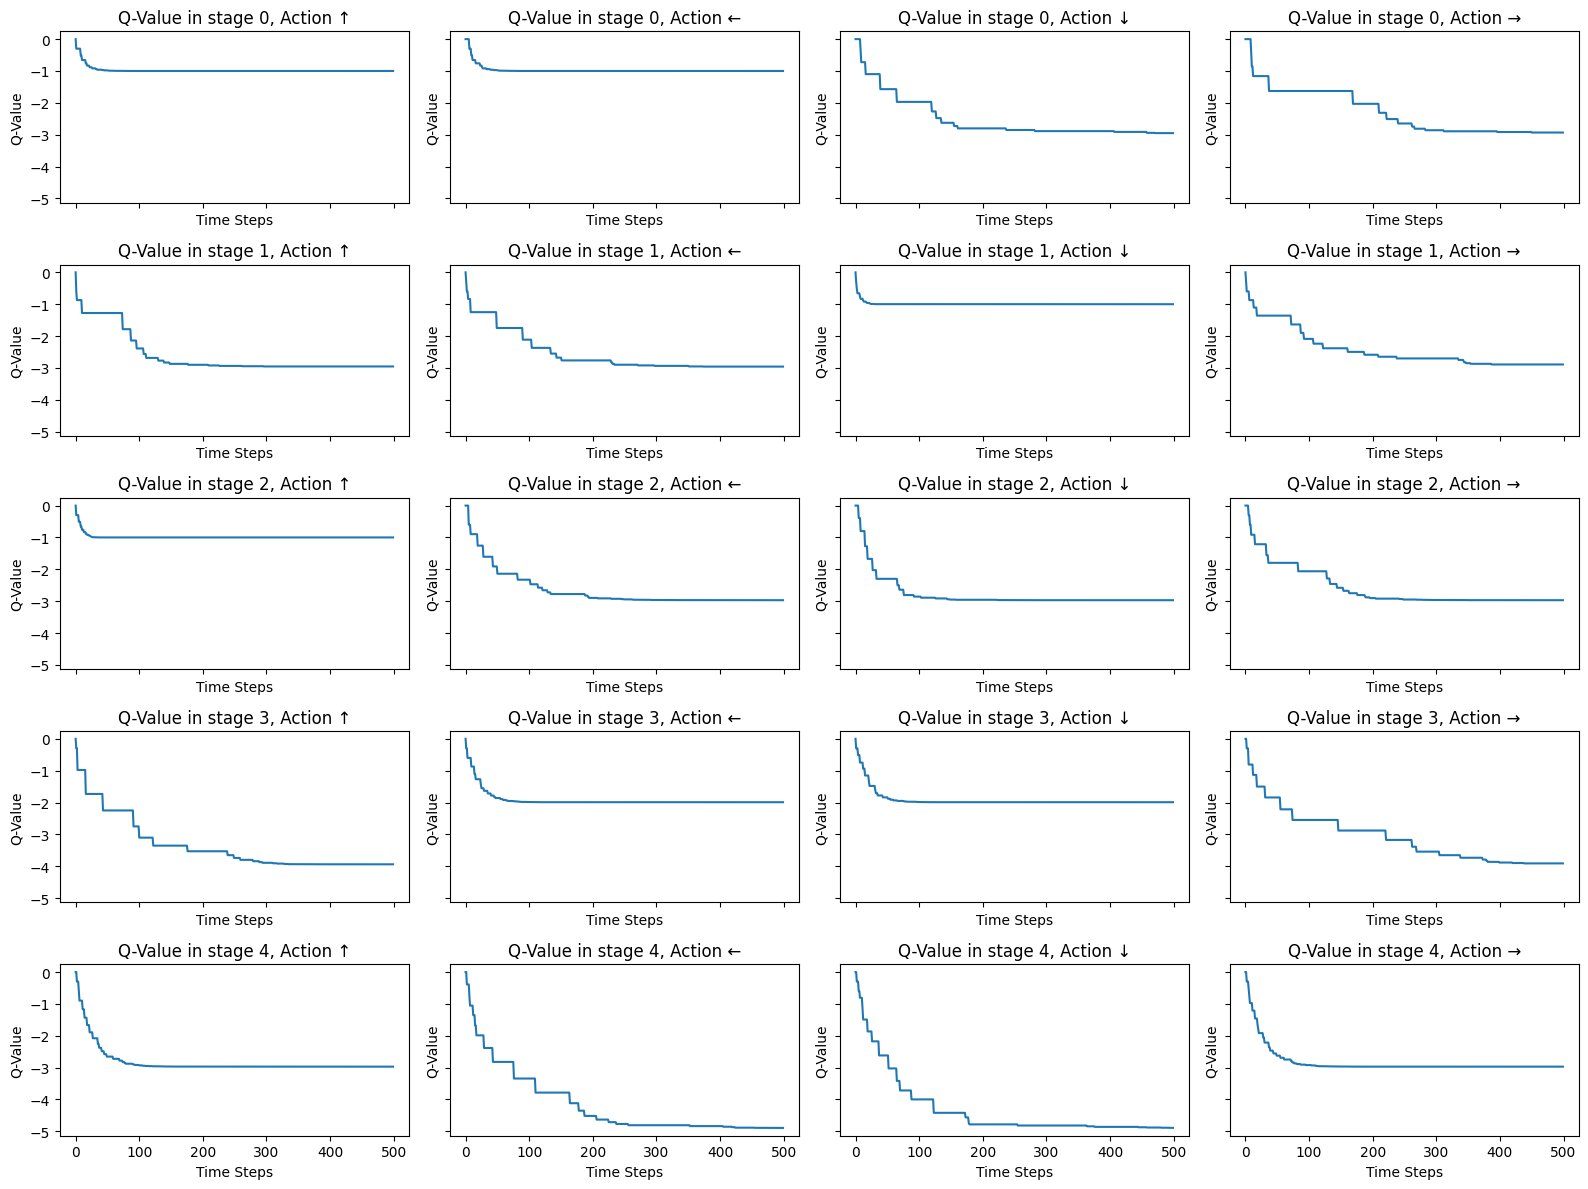

In [90]:
visualize_sample_q_value(np.array(sampled_q_value_025))

In [91]:
env = Flags()
q_01 = QLearning(env, eps=0.1)
rewards_per_episode_01, length_per_episode_01, max_q_changes_01, sampled_q_value_01 = q_01.off_policy()
q_01.print_final_policy()
q_01.inference()


Final Policy for ε = 0.1:
policy in stage 0
↑ ↓ ↓ ↓ ←
→ ↑ ← ← ←
↑ ↑ ↑ ← ↑
→ ↑ ← ← ←
← ↑ ← ↑ ←
policy in stage 1
← ↓ ↓ → ↑
↓ ↓ ↓ ↓ →
→ ↓ ↓ ↓ ↓
↓ ↓ ↓ ↓ ↓
→ → ↑ ← ↑
policy in stage 2
← → ↑ ← ←
↓ ↑ ↑ ↑ ↑
↑ ↑ ↑ ← ←
↑ → ↑ ← ←
→ ↓ ↑ ↓ ↑
policy in stage 3
↓ ← ↓ ↑ →
↓ ← ← ↓ →
↓ ← ← ← ↑
↑ ← ← ← ←
↑ ← ↑ ↓ →
policy in stage 4
→ → → → ↑
↑ ↑ ↑ ↑ ↑
↑ → ↑ ↑ ↑
→ → → ↑ ↑
→ → ↑ → ↑
====Result===
Take 26 for the goal
Total reward -21


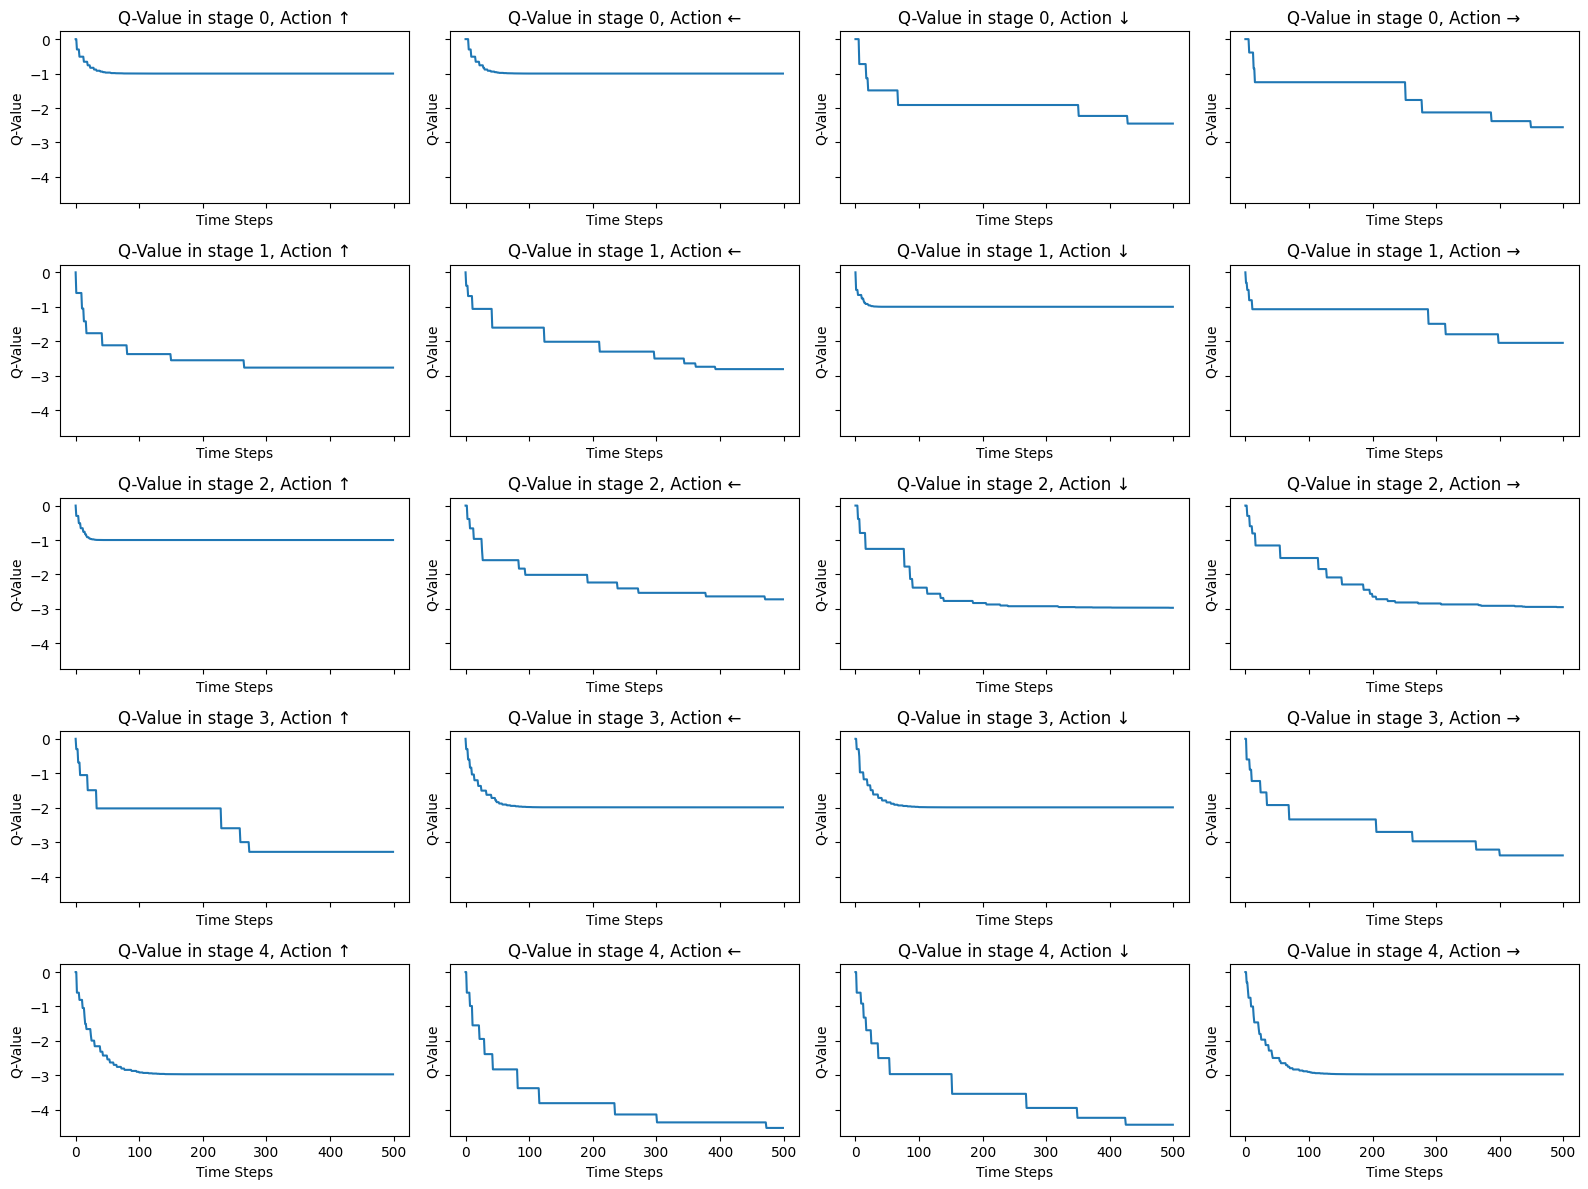

In [92]:
visualize_sample_q_value(np.array(sampled_q_value_01))

In [93]:
env = Flags()
q_001 = QLearning(env, eps=0.01)
rewards_per_episode_001, length_per_episode_001, max_q_changes_001, sampled_q_value_001 = q_001.off_policy()
q_001.print_final_policy()
q_001.inference()


Final Policy for ε = 0.01:
policy in stage 0
↑ ↓ ← ← ↓
→ ↑ ← ← ←
← ↑ ↑ ← ↑
← ↑ ← ↑ ↑
← ↑ → ↑ ↑
policy in stage 1
→ ← ↓ → ←
↓ ↓ ↓ ↓ ↑
← ↓ ↓ ↓ →
↓ ↓ ↓ ↑ ←
→ → ↑ ← ↓
policy in stage 2
↑ → ↑ ← ←
← ↓ ↑ ↑ ↑
↑ ← ↑ ↓ ←
↑ ↑ ↑ → ←
→ ↑ ↑ → ↑
policy in stage 3
↓ ← ↓ ↑ ↓
↓ ↓ ↓ → ↓
↓ ← ↓ ← ←
↑ ← ← ↑ ↓
↑ ↓ → ← ←
policy in stage 4
→ → → → ↑
→ → → ↑ ↑
→ ↑ → ↑ ↑
↑ → → → ↑
→ → ↑ → ↑
====Result===
Take 26 for the goal
Total reward -21


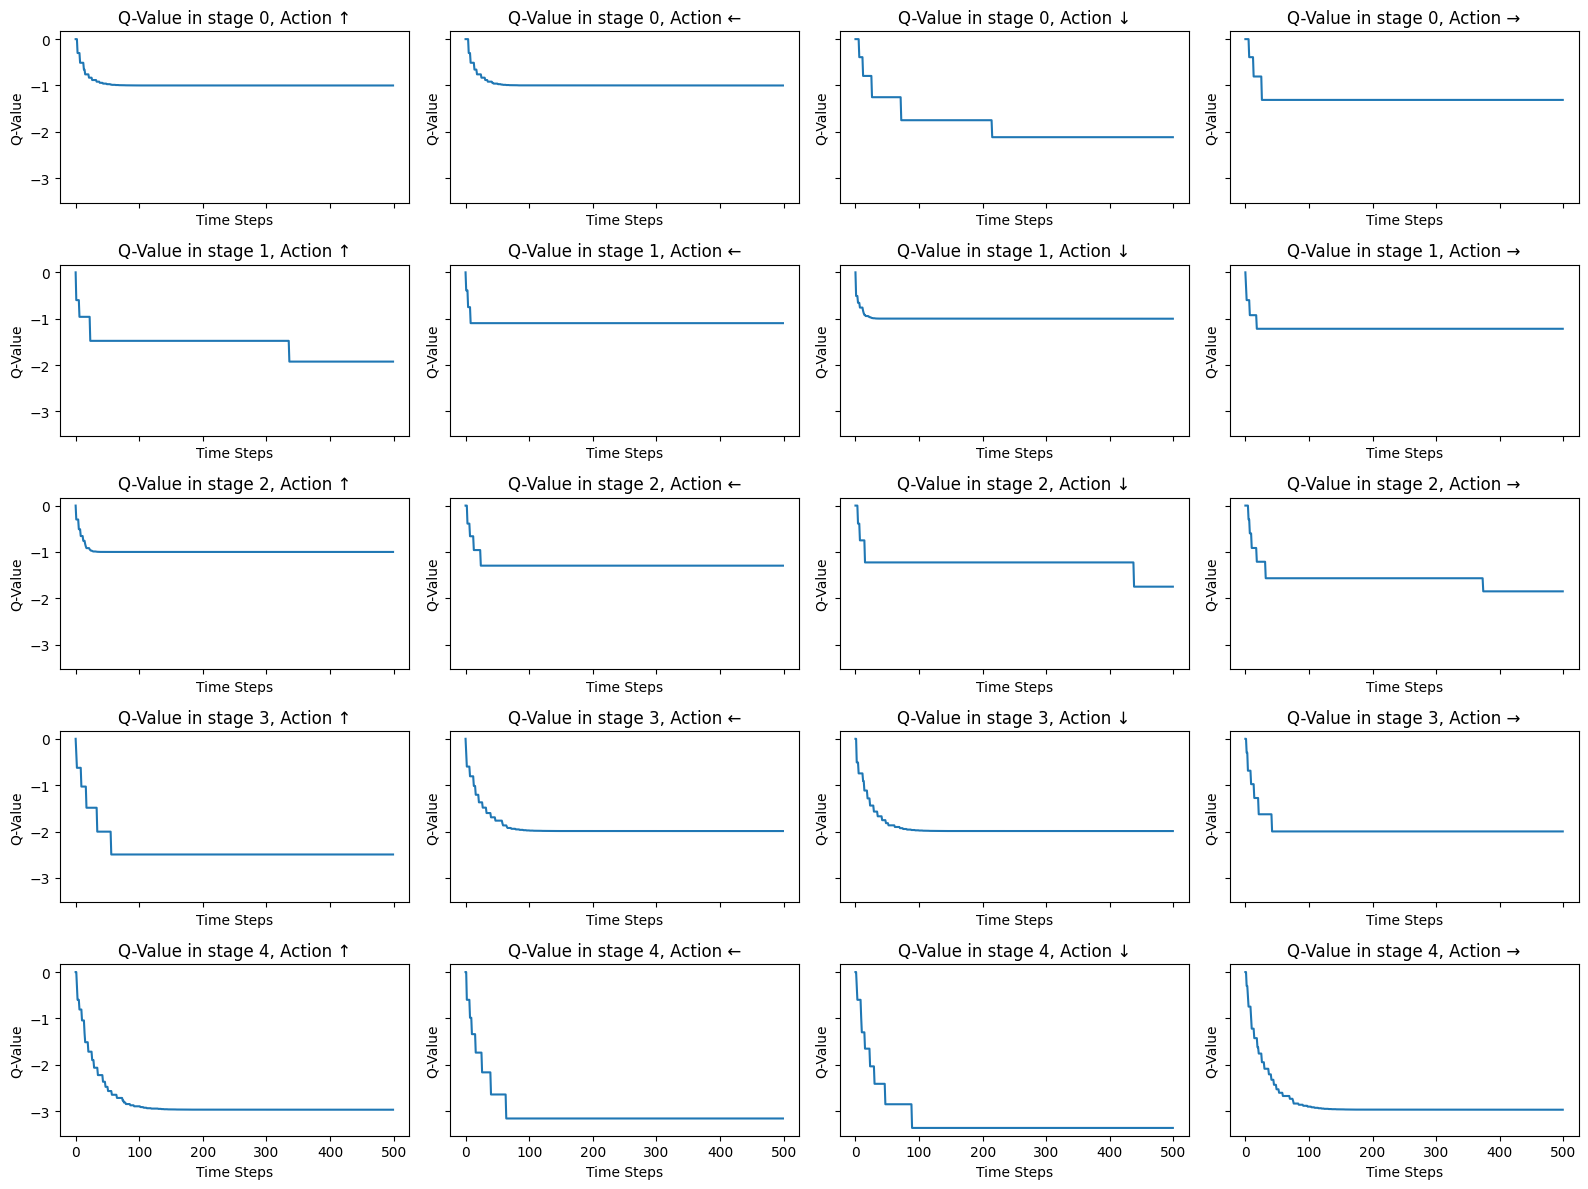

In [94]:
visualize_sample_q_value(np.array(sampled_q_value_001))

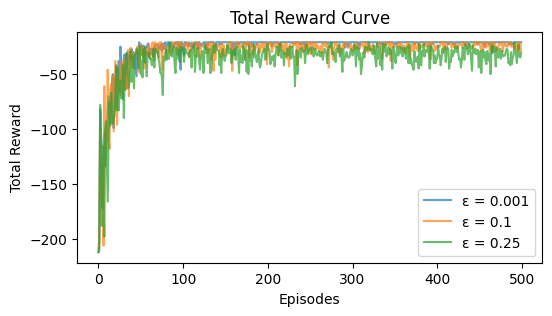

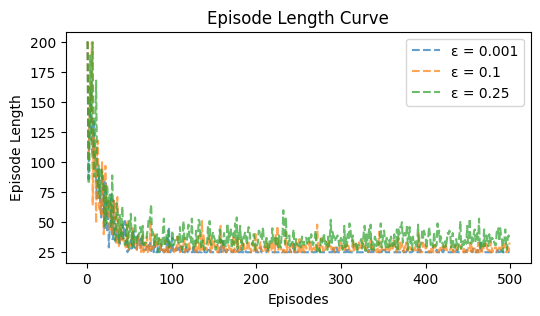

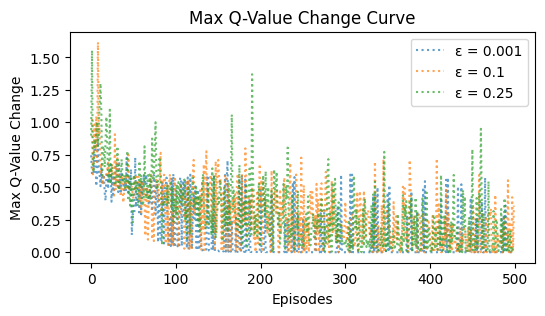

In [95]:

def plot_learning_curves(rewards_list, lengths_list, max_qvalues_list, epsilons):
    x_size = 6
    y_size = 3

    # Total Reward Curve
    plt.figure(figsize=(x_size, y_size))
    for rewards, epsilon in zip(rewards_list, epsilons):
        plt.plot(rewards, label=f"ε = {epsilon}", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title("Total Reward Curve")
    plt.legend()
    plt.show()

    # Episode Length Curve
    plt.figure(figsize=(x_size, y_size))
    for lengths, epsilon in zip(lengths_list, epsilons):
        plt.plot(lengths, label=f"ε = {epsilon}", linestyle="dashed", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Episode Length")
    plt.title("Episode Length Curve")
    plt.legend()
    plt.show()

    # Max Q-Value Change Curve
    plt.figure(figsize=(x_size, y_size))
    for max_qvalues, epsilon in zip(max_qvalues_list, epsilons):
        plt.plot(max_qvalues, label=f"ε = {epsilon}", linestyle="dotted", alpha=0.7)
    plt.xlabel("Episodes")
    plt.ylabel("Max Q-Value Change")
    plt.title("Max Q-Value Change Curve")
    plt.legend()
    plt.show()

rewards_list = [rewards_per_episode_001, rewards_per_episode_01, rewards_per_episode_025]
length_list = [length_per_episode_001, length_per_episode_01, length_per_episode_025]
max_q_list = [max_q_changes_001, max_q_changes_01, max_q_changes_025]
eps_list = [0.001, 0.1, 0.25]

plot_learning_curves(rewards_list, length_list, max_q_list, eps_list)

**Answer**

Based on our experiments, the best value of $\epsilon$ is 0.25. For all tested $\epsilon$ values, all of them successfully identified path that maximized rewards, which took 26 turns and results in reward of -21. However, when analyzing the final policies, $\epsilon=0.25$ generally resulted in more optimal policy across most states. Lower exploration rates led to insufficient exploration, causing some states to not reach the optimal policy. In contrast, $\epsilon=0.25$ balanced exploration and exploitation, allowing the agent to better estimate Q-values and find the optimal policy across the states.Therefore, we chose the best value of $\epsilon$ 0.25 that learned with relatively high variance but generally found the optimal policy well.

If we look at the graph of the change over episodes directly above, we can observe that the values of 1. Reward, 2. Length, and 3. Max Q converge over episodes for all $\epsilon$. This means that over time, the algorithm is learning the policy towards 1. maximum reward, 2. minimum time, and it is 3. converging. However, the behavior is different for different epsilon values: the more we explore, the more scattered and noisy the learning becomes. Also, when we visualize how the q value changes for each stage in the (2,2) state, we can see that each q value converges over time.

The final policy obtained for most trials is as follows:

In [98]:
# Stage 0 refers to the step to get flag 1.
# Stage 1 means the steps to get flag 2.
# Stage 2 means the steps to get flag 3.
# Stage 3 means the steps to get flag 4.
# Stage 4 is the step toward the Goal.

q_025.print_final_policy()


Final Policy for ε = 0.25:
policy in stage 0
← ↓ ↓ ↓ ←
→ ↑ ← ← ←
→ ↑ ↑ ↑ ←
→ ↑ ↑ ← ↑
← ↑ ↑ ↑ ↑
policy in stage 1
← ↓ ↓ ↑ ↓
→ ↓ ↓ ← ↑
→ ↓ ↓ ← →
→ ↓ ↓ ← →
→ → ↑ ← ↓
policy in stage 2
→ → ↑ ← ←
→ ↑ ↑ ← ←
↓ → ↑ ↑ ↑
↑ → ↑ ↑ ←
← → ↑ ← ↑
policy in stage 3
↓ ← ↓ ↓ ↑
↓ ← ↓ ← ↑
↓ ← ↓ ← ←
↑ ← ← ← ←
↑ ↑ ↑ ↓ →
policy in stage 4
→ → → → ↑
↑ → → → ↑
↑ → ↑ ↑ ↑
↑ ↑ → ↑ ↑
↑ ↑ → → ↑


The policy aligns well with an optimal strategy, where the agent effectively chooses the best actions.


Also, the Q-values were mostly between -1 and -5. When we checked the Q-value in the (2,2) state, the final Q-value learned in each stage was as follows. The bold indicates the max Q-value at each stage.

|  | Up | Left | Down | Right |
| --- | --- | --- | --- | --- |
| Flag 1 | **-1.0000** | **-1.0000** | -2.9317 | -2.9138 |
| Flag 2 | -2.9684 | -2.9521 | -**1.0000** | -2.8530 |
| Flag 3 | -**1.0000** | -2.9701 | -2.9701 | -2.9700 |
| Flag 4 | -3.9111 | **-1.9900** | **-1.9900** | -3.9037 |
| Goal | -**2.9701** | -4.8070 | -4.8945 | -**2.9701** |

4.2. Implement on-policy one-step Sarsa algorithm as discussed in class. Test  $\epsilon=\{0.01, 0.1, 0.25\}$ and  answer the same questions as in 3.2.[12 Marks]

In [99]:
import numpy as np
import random

class SARSA:
    def __init__(self, env, eps, gamma=0.99, alpha=0.3, num_episodes=500):
        self.env = env
        self.eps = eps
        self.gamma = gamma
        self.alpha = alpha
        self.num_episodes = num_episodes
        self.action_symbols = {0: '↑', 1: '←', 2: '↓', 3: '→'}

        self.Q = None

    def on_policy(self):
        Q = np.zeros((5, 5, 5, 4))
        rewards_per_episode = []
        length_per_episode = []
        max_q_changes = []
        sampled_q_value = [[], [], [], [], []]

        for n in range(self.num_episodes):
            state = self.env.reset()
            total_length = None
            total_reward = 0
            old_Q = Q.copy()

            for f in range(len(Q)):
                sampled_q_value[f].append(np.copy(Q[f][2][2]))

            row, col = state
            flags_obtained = self.env.flags_obtained

            if random.uniform(0, 1) < self.eps:
                action = random.choice(self.env.actions_space(state))  # Explore
            else:
                action = np.argmax(Q[flags_obtained, row, col])  # Exploit

            for i in range(200):
                old_flags_obtained = flags_obtained
                next_state, reward = self.env.transition(state, action)
                next_row, next_col = next_state
                flags_obtained = self.env.flags_obtained

                total_reward += reward

                if flags_obtained >= 5:
                    Q[old_flags_obtained, row, col, action] += self.alpha * (reward)
                    total_length = i
                    break
                else:
                    if random.uniform(0, 1) < self.eps:
                        next_action = random.choice(self.env.actions_space(next_state))  # Explore
                    else:
                        next_action = np.argmax(Q[flags_obtained, next_row, next_col])  # Exploit

                    Q[old_flags_obtained, row, col, action] += self.alpha * (
                        reward + self.gamma * Q[old_flags_obtained, next_row, next_col, next_action]
                        - Q[old_flags_obtained, row, col, action]
                    )

                state = next_state
                row, col = next_row, next_col
                action = next_action

            total_length = 200 if total_length == None else total_length
            length_per_episode.append(total_length)
            rewards_per_episode.append(total_reward)

            max_change = np.max(np.abs(Q - old_Q))
            max_q_changes.append(max_change)

        self.Q = Q
        return rewards_per_episode, length_per_episode, max_q_changes, sampled_q_value

    def print_final_policy(self):
        print(f"\nFinal Policy for ε = {self.eps}:")

        for f in range(5):
            grid_display = []
            print(f"policy in stage {f}")
            for r in range(5):
                row_display = []
                for c in range(5):
                    best_action = np.argmax(self.Q[f, r, c])
                    row_display.append(self.action_symbols[best_action])
                grid_display.append(row_display)

            for row_disp in grid_display:
                print(' '.join(row_disp))

    def inference(self):
        state = self.env.reset()
        total_reward = 0
        total_iter = 0

        while True:
            total_iter += 1
            row, col = state
            action = np.argmax(self.Q[self.env.flags_obtained,row, col])
            next_state, reward = self.env.transition(state, action)
            state = next_state

            total_reward += reward

            if self.env.flags_obtained >= 5:
                break

        print("====Result===")
        print(f"Take {total_iter} for the goal")
        print(f"Total reward {total_reward}")


In [100]:
env = Flags()
sarsa_025 = SARSA(env, eps=0.25)
sarsa_rewards_per_episode_025, sarsa_length_per_episode_025, sarsa_max_q_changes_025, sarsa_sampled_q_value_025 = sarsa_025.on_policy()
sarsa_025.print_final_policy()
sarsa_025.inference()



Final Policy for ε = 0.25:
policy in stage 0
← ↓ ← ↓ ←
→ ↑ ← ← ←
↑ ↑ ← ← ↑
↑ ↑ ↑ ← ↑
↑ ↑ ↑ ↑ ↑
policy in stage 1
↑ ↑ → ← ←
→ ↓ ↓ ↓ ↓
→ ↓ ↓ ↓ ↓
↓ ↓ ↓ ↓ ←
→ → ↑ ← ←
policy in stage 2
→ → ↑ ← ←
↑ → ↑ ↑ ←
→ ↑ ↑ ← ←
↑ ↑ ↑ ↑ →
↓ ↑ ↑ ↑ ↑
policy in stage 3
↓ ← ↓ ↓ ↓
↓ ↓ ← ↓ ↑
↓ ← ← ↓ →
↑ ← ← ← ←
↑ ← ← ← ←
policy in stage 4
→ → → → ↑
↑ ↑ → → ↑
→ → → → ↑
↑ → → → ↑
→ → → ↓ ↑
====Result===
Take 26 for the goal
Total reward -21


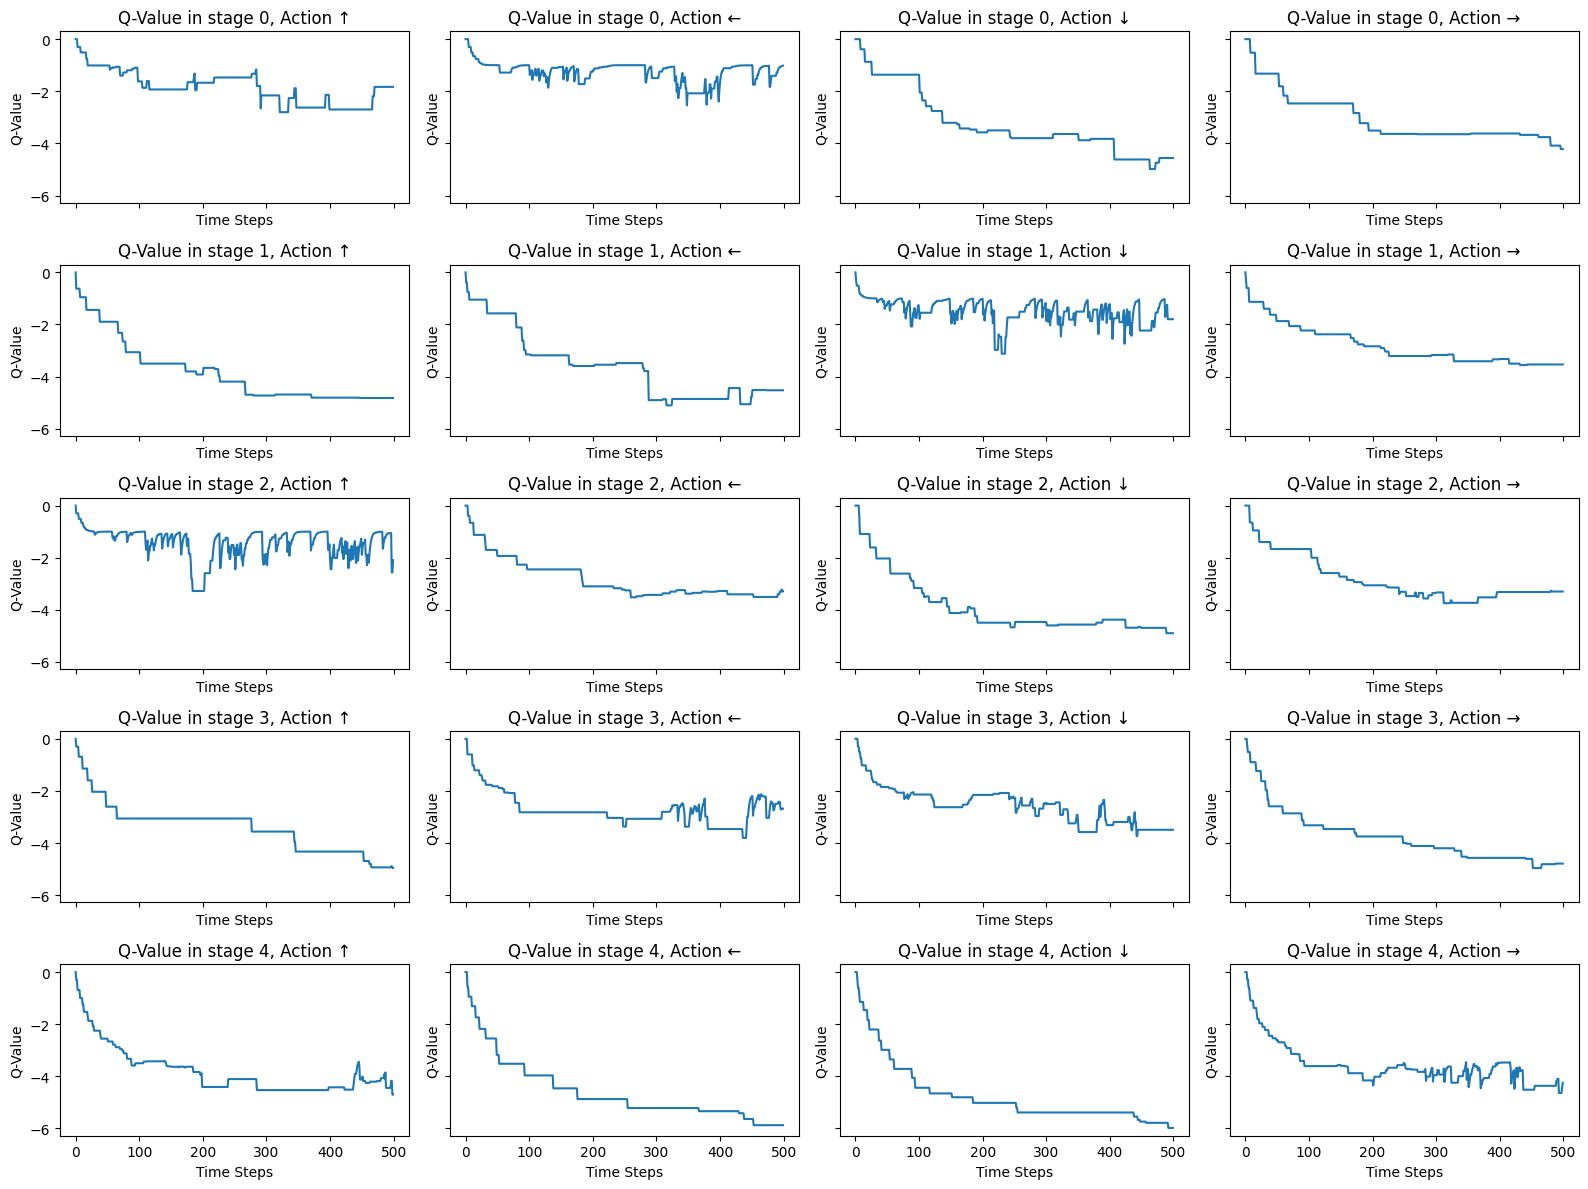

In [101]:
visualize_sample_q_value(np.array(sarsa_sampled_q_value_025))

In [102]:
sarsa_010 = SARSA(env, eps=0.1)
sarsa_rewards_per_episode_010, sarsa_length_per_episode_010, sarsa_max_q_changes_010, sarsa_sampled_q_value_010 = sarsa_010.on_policy()
sarsa_010.print_final_policy()
sarsa_010.inference()


Final Policy for ε = 0.1:
policy in stage 0
↓ ↓ ← ↓ ↓
→ ↑ ← ← ←
↓ ↑ ↑ ↑ ↑
↑ ↑ ← ← ←
← ↑ ← ← ↑
policy in stage 1
→ ← → → ↓
→ → ↓ → →
→ ↓ ↓ ← ↑
↓ ↓ ↓ ← ↓
→ → ↑ ← ←
policy in stage 2
→ → ↑ ← ←
→ → ↑ ← ←
↑ ↑ ↑ ↑ ←
← ↑ ↑ ↑ →
↑ → ↑ ↑ ↑
policy in stage 3
↓ ← ↓ ↓ ←
↓ ↓ ↓ ↓ ←
↓ ↓ ↓ ← →
↑ ← ← ← ↑
↑ ← ← ← ←
policy in stage 4
→ → → → ↑
↑ ↑ → → ↑
→ → ↑ → ↑
→ ↑ → ↑ ↑
→ → → ↑ ↑
====Result===
Take 26 for the goal
Total reward -21


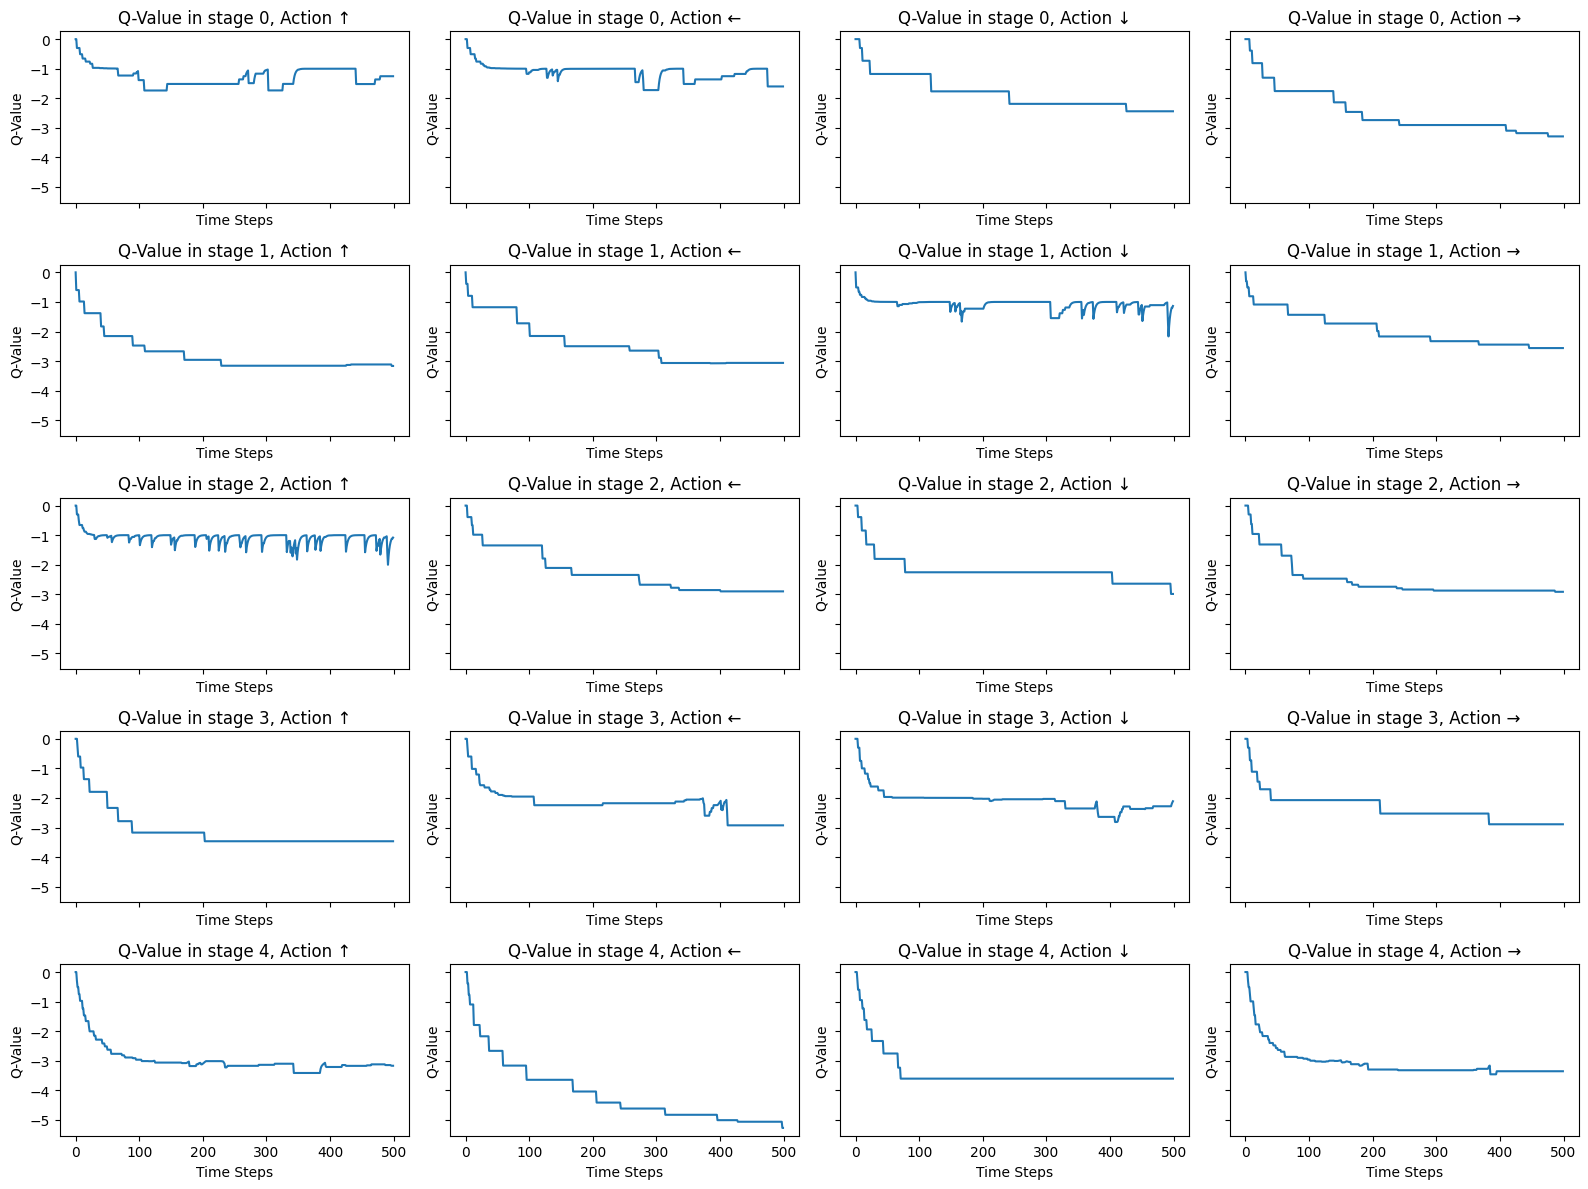

In [103]:
visualize_sample_q_value(np.array(sarsa_sampled_q_value_010))

In [104]:
sarsa_0001 = SARSA(env, eps=0.001)
sarsa_rewards_per_episode_0001, sarsa_length_per_episode_0001, sarsa_max_q_changes_0001, sarsa_sampled_q_value_0001 = sarsa_0001.on_policy()
sarsa_0001.print_final_policy()
sarsa_0001.inference()


Final Policy for ε = 0.001:
policy in stage 0
↓ ↓ ↓ ↓ →
→ ↑ ← ← ←
→ ↑ ↑ ↑ ←
↓ ↑ ← ↑ ↑
← ↑ ↑ ↑ ←
policy in stage 1
↑ ← → ↑ →
← → ↓ ↑ ↓
← → ↓ → ↓
↓ → ↓ ← ↓
↑ → ↑ ← ←
policy in stage 2
↓ → ↑ ← ←
→ ← ↑ → →
↓ ↑ ↑ ↑ ←
↑ ↑ ↑ ↑ ←
↑ ← ↑ → ↓
policy in stage 3
↓ ↓ ← ↓ ←
↓ ↓ ↓ ↓ ←
↓ ↓ ← ← ↓
↑ ← ← ↑ ↑
↑ ← ↑ ← ↑
policy in stage 4
→ → → → ↑
↑ ↑ → ↑ ↑
↑ ↑ ↑ ↑ ↑
→ → ↑ ↑ ↑
→ → → → →
====Result===
Take 26 for the goal
Total reward -21


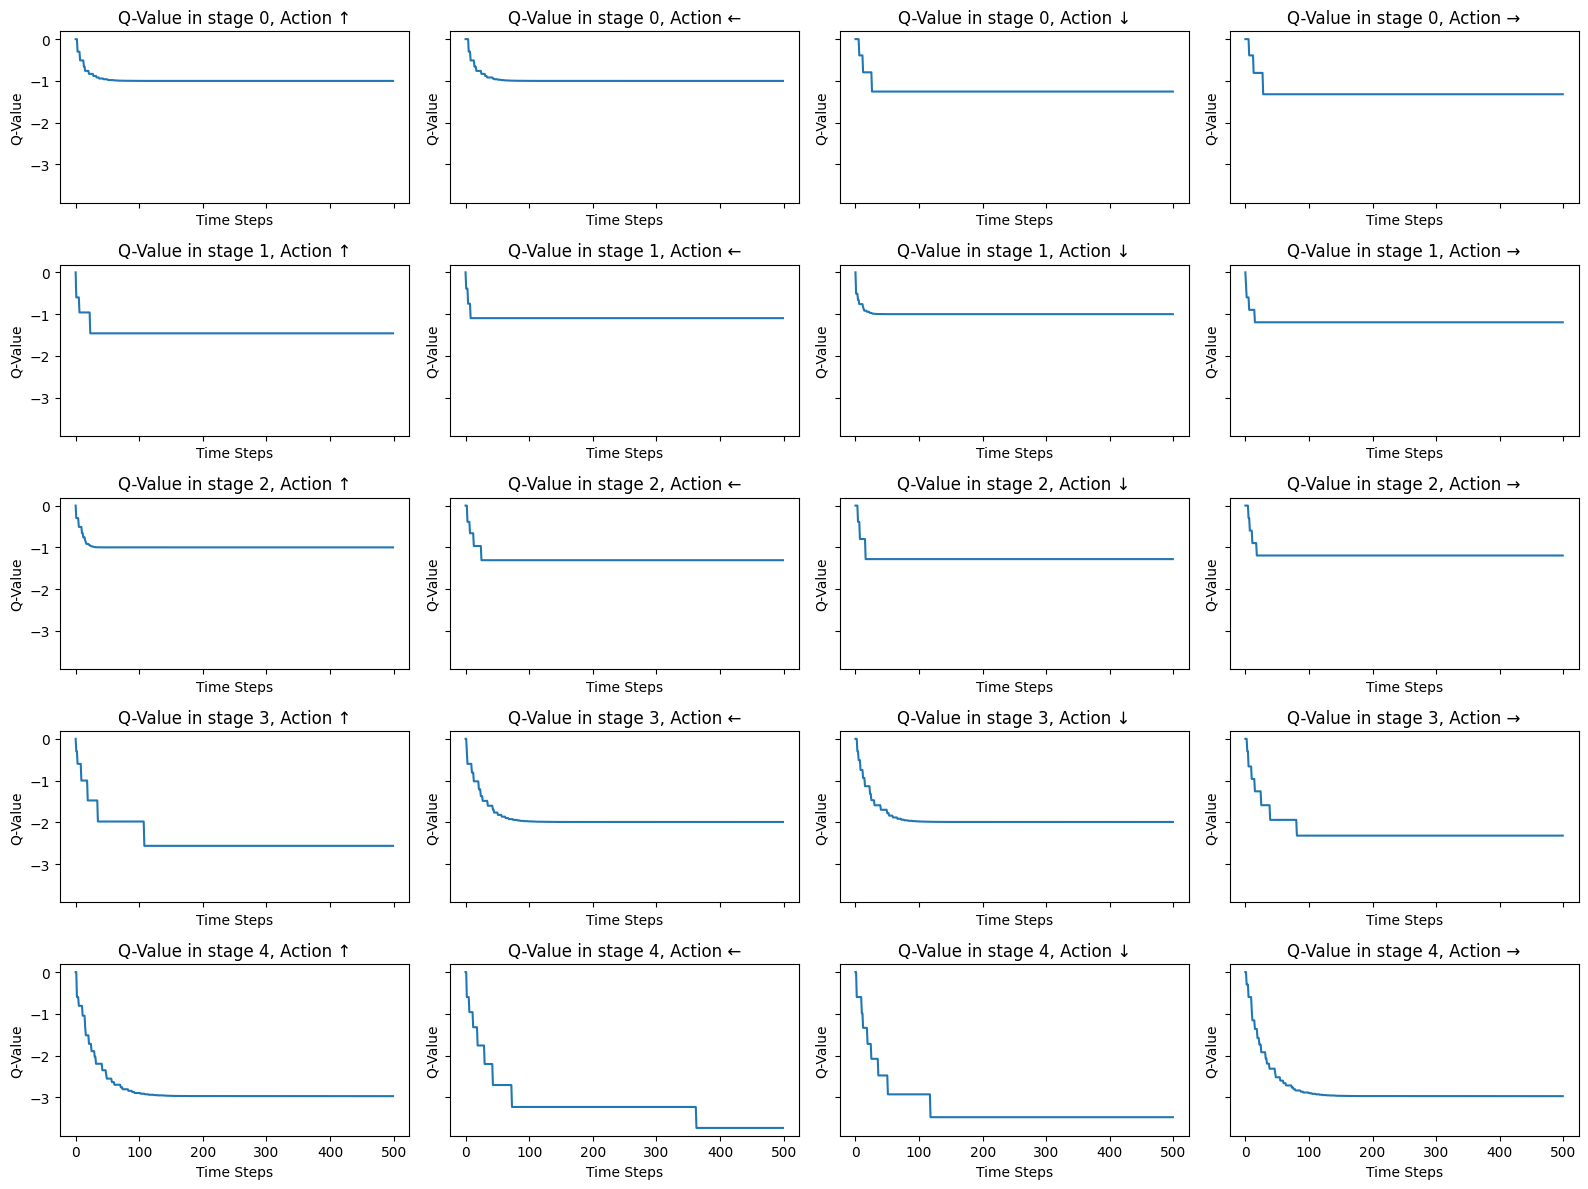

In [105]:
visualize_sample_q_value(np.array(sarsa_sampled_q_value_0001))

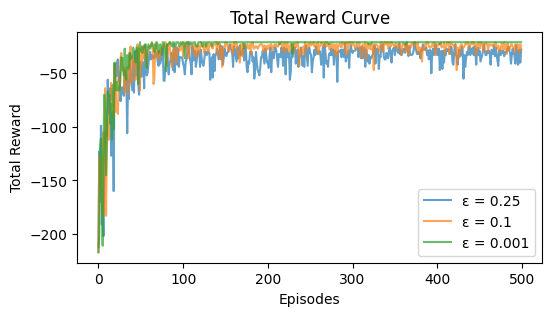

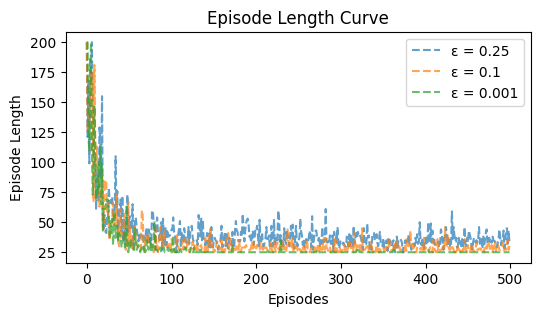

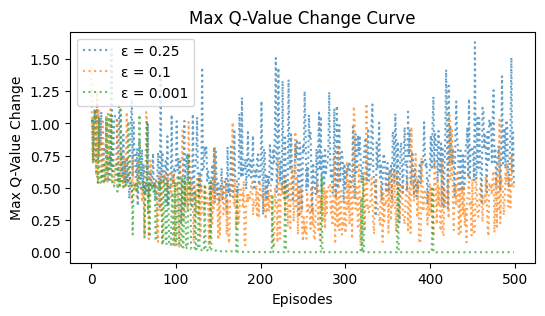

In [106]:
sarsa_rewards_list = [sarsa_rewards_per_episode_025, sarsa_rewards_per_episode_010, sarsa_rewards_per_episode_0001]
sarsa_length_list = [sarsa_length_per_episode_025, sarsa_length_per_episode_010, sarsa_length_per_episode_0001]
sarsa_max_q_list = [sarsa_max_q_changes_025, sarsa_max_q_changes_010, sarsa_max_q_changes_0001]
sarsa_eps_list = [0.25, 0.1, 0.001]

plot_learning_curves(sarsa_rewards_list, sarsa_length_list, sarsa_max_q_list, sarsa_eps_list)

**Answer**
Based on our experiments, we found that the optimal value for $\epsilon$ is 0.25. Across all tested $\epsilon$ values, the algorithm consistently identified a path that maximized rewards, thak tooks 26 steps and results a final reward of -21. However, upon examining the learned policies,$\epsilon=0.25$ generally resulted in a more optimal policy across most states. Lower $\epsilon$ values led to insufficient exploration, preventing some states from reaching the optimal policy. In contrast, $\epsilon=0.25$ effectively balanced exploration and exploitation, enabling the agent to better estimate Q-values and learn the optimal policy across different states. Although learning with this $\epsilon$ introduced relatively high variance, it ultimately achieved better policy optimization.

Looking at the graph of changes over episodes, we can observe that three key metrics—1) reward, 2) episode length, and 3) maximum Q-value—gradually converge over time for all $\epsilon$ values. This indicates that the algorithm is learning a policy that optimizes for higher rewards, minimizes the number of steps, and overall stabilizes. However, the extent of exploration affects the learning behavior: higher exploration rates lead to more scattered and noisy learning trajectories. Additionally, when visualizing the evolution of Q-values for each action in the (2,2) state, we see that they converge over time, confirming the learning process.

The final policy obtained in most trials is as follows:

In [107]:
sarsa_025.print_final_policy()


Final Policy for ε = 0.25:
policy in stage 0
← ↓ ← ↓ ←
→ ↑ ← ← ←
↑ ↑ ← ← ↑
↑ ↑ ↑ ← ↑
↑ ↑ ↑ ↑ ↑
policy in stage 1
↑ ↑ → ← ←
→ ↓ ↓ ↓ ↓
→ ↓ ↓ ↓ ↓
↓ ↓ ↓ ↓ ←
→ → ↑ ← ←
policy in stage 2
→ → ↑ ← ←
↑ → ↑ ↑ ←
→ ↑ ↑ ← ←
↑ ↑ ↑ ↑ →
↓ ↑ ↑ ↑ ↑
policy in stage 3
↓ ← ↓ ↓ ↓
↓ ↓ ← ↓ ↑
↓ ← ← ↓ →
↑ ← ← ← ←
↑ ← ← ← ←
policy in stage 4
→ → → → ↑
↑ ↑ → → ↑
→ → → → ↑
↑ → → → ↑
→ → → ↓ ↑


Other epsilon values typically obtain the similar policy.

Also, the Q-values were mostly between -1 and -4. For example, when we checked the Q-value in the (2,2) state, the final Q-value learned in each stage was as follows. The bold indicates the max Q-value at each stage.

|  | Up | Left | Down | Right |
| --- | --- | --- | --- | --- |
| Flag 1 | **-1.0007** | **-1.0007** | -3.9382 | -3.9910 |
| Flag 2 | -4.4399 | -4.3878 | -**2.1950** | -3.2387 |
| Flag 3 | -**1.4303** | -3.6685 | -5.3562 | -3.5722 |
| Flag 4 | -5.7036 | **-2.8107** | **-2.8107** | -4.4983 |
| Goal | -**3.7158** | -6.6925 | -5.8930 | -**3.7158** |


### 5 Comparing Algorithms [25 Marks]

In the final section of your report, you must compare the different control algorithm you implemented on the Flags domain. In particular, please comment on at least the following issues in your report:

**(a) Were the Q-value functions and policies you obtained using each algorithm similar? Were they different? Comment on this using the properties of each algorithm you learned in class [6 Marks]**

First, Monte Carlo, unlike the other two algorithms, updates the Q-value based on the return value obtained after the end of the episode. This means that it learns by considering the entire sampled trajectory, so updates are relatively infrequent, but they reflect the long-term expected reward. Because of this, Q-value fluctuations can be large, and the learning speed can be relatively slow.

Q-learning and SARSA, on the other hand, use the Temporal Difference (TD) method to learn. Both algorithms update the Q-value every step and can learn faster than Monte Carlo. However, the two algorithms differ in how they update the policy.

Q-learning uses an off-policy learning approach, updating based on the action with the largest Q-value, regardless of the actual action taken. This means it is more likely to learn in a greedy way and find the optimal policy faster. However, it can be less stable during the learning process and can be volatile if the environment is stochastic.
SARSA uses an on-policy learning approach, updating the Q-value based on actual actions taken. This allows for more stable learning because it follows the policy as it learns, but it can be slower to find the optimal policy compared to Q-learning if not enough exploration is done.
These differences are likely responsible for the different convergence behavior and scale of the Q-value function. However, since the objective of finding the optimal policy is the same, the finalized policies tend to converge similarly to each other after sufficient training.

**(b) Use the plots you created for each ε to make a detailed comparison of the performance of the algorithms implemented in 3.2, 4.1 and 4.2. Answer the following questions for each ε you tested. Which one converged the fastest on average? Which one the slowest? Which one had lower variance and which had higher variance? Why? [6 Marks]**

In [108]:
def eps_plot_learning_curves(rewards_list, lengths_list, max_qvalues_list, algorithms, eps):

    fig, axes = plt.subplots(3, 1, figsize=(6, 9))
    fig.suptitle(f"ε = {eps}")

    for rewards, algo in zip(rewards_list, algorithms):
        axes[0].plot(rewards, label=f"{algo}", alpha=0.7)
    axes[0].set_xlabel("Episodes")
    axes[0].set_ylabel("Total Reward")
    axes[0].set_title("Total Reward Curve")
    axes[0].legend()

    for lengths, algo in zip(lengths_list, algorithms):
        axes[1].plot(lengths, label=f"{algo}", linestyle="dashed", alpha=0.7)
    axes[1].set_xlabel("Episodes")
    axes[1].set_ylabel("Episode Length")
    axes[1].set_title("Episode Length Curve")
    axes[1].legend()

    for max_qvalues, algo in zip(max_qvalues_list, algorithms):
        axes[2].plot(max_qvalues, label=f"{algo}", linestyle="dotted", alpha=0.7)
    axes[2].set_xlabel("Episodes")
    axes[2].set_ylabel("Max Q-Value Change")
    axes[2].set_title("Max Q-Value Change Curve")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# Epsilon 0.001
rewards_list_001 = [mc_eps_001.total_rewards_history, rewards_per_episode_001, sarsa_rewards_per_episode_0001]
length_list_001 = [mc_eps_001.episode_length_history, length_per_episode_001, sarsa_length_per_episode_0001]
max_q_list_001 = [mc_eps_001.max_q_value_change, max_q_changes_001, sarsa_max_q_changes_0001]

# Epsilon 0.01
rewards_list_01 = [mc_eps_01.total_rewards_history, rewards_per_episode_01, sarsa_rewards_per_episode_010]
length_list_01 = [mc_eps_01.episode_length_history, length_per_episode_01, sarsa_length_per_episode_010]
max_q_list_01 = [mc_eps_01.max_q_value_change, max_q_changes_01, sarsa_max_q_changes_010]

# Epsilon 0.025
rewards_list_025 = [mc_eps_025.total_rewards_history, rewards_per_episode_025, sarsa_rewards_per_episode_025]
length_list_025 = [mc_eps_025.episode_length_history, length_per_episode_025, sarsa_length_per_episode_025]
max_q_list_025 = [mc_eps_025.max_q_value_change, max_q_changes_025, sarsa_max_q_changes_025]


algo = ["MonteCarlo", "Q-Learning", "SARSA"]

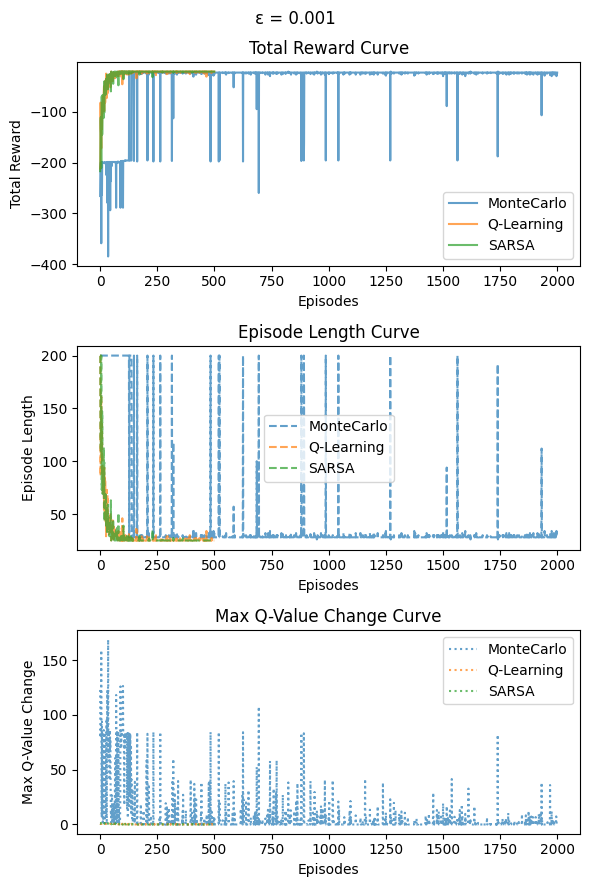

In [109]:
eps_plot_learning_curves(rewards_list_001, length_list_001, max_q_list_001, algo, eps=0.001)

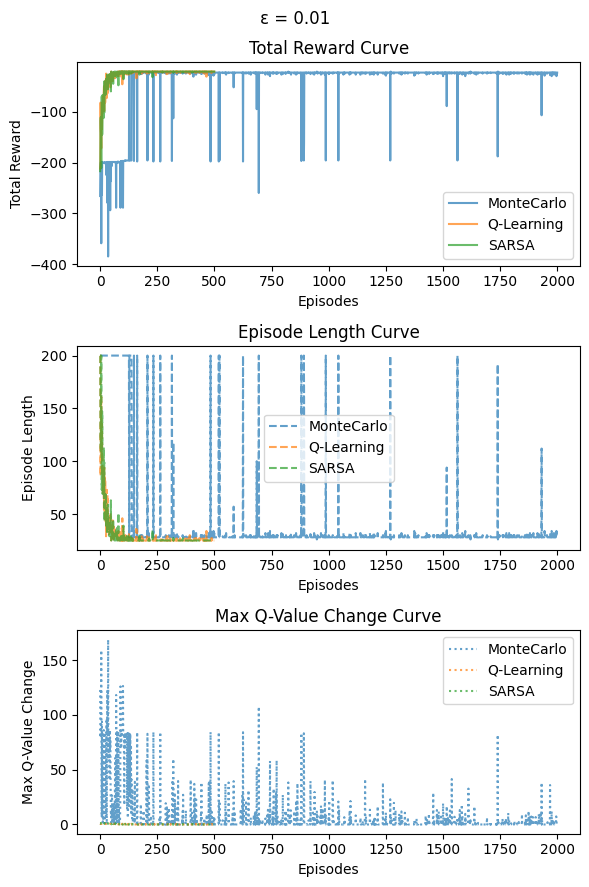

In [110]:
eps_plot_learning_curves(rewards_list_001, length_list_001, max_q_list_001, algo, eps=0.01)

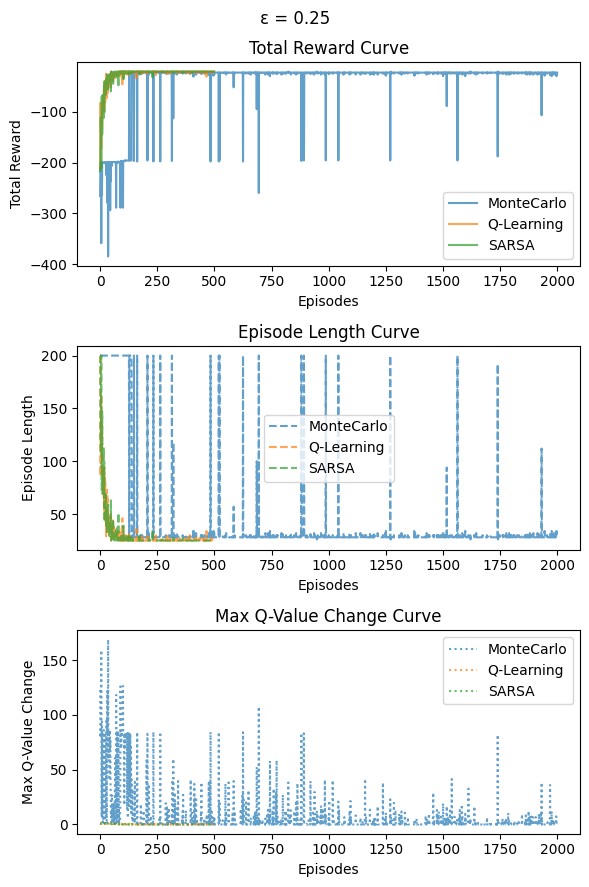

In [111]:
eps_plot_learning_curves(rewards_list_001, length_list_001, max_q_list_001, algo, eps=0.25)

Monte Carlo, Q-Learning, and SARSA showed similar behavior for different epsilon values.
First, for all three epsilons, Monte Carlo converged the slowest and SARSA converged the fastest.
The reason Monte Carlo converged the slowest is because the algorithm only updates values after the end of an episode, which means it has to sample the entire episode for a single update, which significantly slows down learning for longer or more complex environments. SARSA, on the other hand, is TD-based, updating values every timestep, so it learns quickly. SARSA tends to be stable and converges quickly because it is based on the current policy and then updates it using Q-values. Q-Learning is an off-policy method, which explores more aggressively because it uses the largest Q-value of possible actions to update rather than the actual action taken, but this can lead to increased instability and can converge slower than SARSA.

In terms of variance, Monte Carlo had the highest variance, while SARSA had the lowest variance. Since Monte Carlo only updates based on the actual return after the entire episode is over, if the reward in each episode changes significantly, the update value will also change significantly. This leads to higher variance in the learning process and slower convergence. SARSA, on the other hand, performs TD updates one step at a time and updates based on the behavior that follows the current policy, so the values do not change drastically and learning is relatively stable.

**(c) Choose one particular ε for all three algorithms and one of the importance sampling Monte Carlo control, compare their testing performances of policies learned by all the algorithm (try to visualize this comparison). [13 Marks]**

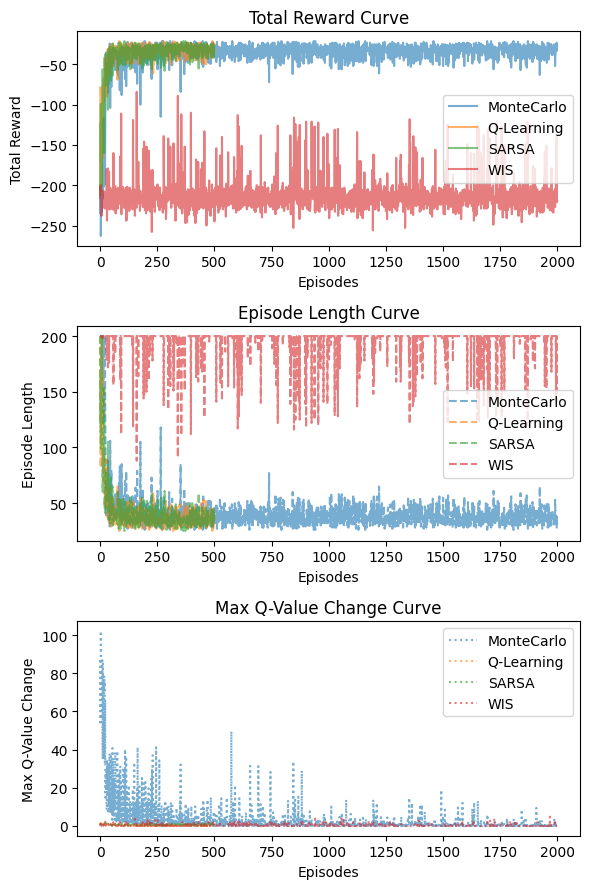

In [112]:
def total_plot_learning_curves(rewards_list, lengths_list, max_qvalues_list, algorithms):

    fig, axes = plt.subplots(3, 1, figsize=(6, 9))

    for rewards, algo in zip(rewards_list, algorithms):
        axes[0].plot(rewards, label=f"{algo}", alpha=0.6)
    axes[0].set_xlabel("Episodes")
    axes[0].set_ylabel("Total Reward")
    axes[0].set_title("Total Reward Curve")
    axes[0].legend()

    for lengths, algo in zip(lengths_list, algorithms):
        axes[1].plot(lengths, label=f"{algo}", linestyle="dashed", alpha=0.6)
    axes[1].set_xlabel("Episodes")
    axes[1].set_ylabel("Episode Length")
    axes[1].set_title("Episode Length Curve")
    axes[1].legend()

    for max_qvalues, algo in zip(max_qvalues_list, algorithms):
        axes[2].plot(max_qvalues, label=f"{algo}", linestyle="dotted", alpha=0.6)
    axes[2].set_xlabel("Episodes")
    axes[2].set_ylabel("Max Q-Value Change")
    axes[2].set_title("Max Q-Value Change Curve")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# Epsilon 0.025
rewards_list = [mc_eps_025.total_rewards_history, rewards_per_episode_025, sarsa_rewards_per_episode_025, mc_wis.total_rewards_history]
length_list = [mc_eps_025.episode_length_history, length_per_episode_025, sarsa_length_per_episode_025, mc_wis.episode_length_history]
max_q_list = [mc_eps_025.max_q_value_change, max_q_changes_025, sarsa_max_q_changes_025, mc_wis.max_q_value_change]


algo = ["MonteCarlo", "Q-Learning", "SARSA", "WIS"]

total_plot_learning_curves(rewards_list, length_list, max_q_list, algo)

In [113]:
print("\nInference Monte Carlo with ε=0.25")
mc_eps_025.inference()

print("\nInference Monte Carlo with WIS")
mc_wis.inference()

print("\nInference Q-Learning with ε=0.25")
q_025.inference()

print("\nInference SARSA with ε=0.25")
sarsa_025.inference()


Inference Monte Carlo with ε=0.25
====Result==
Take 26 for the goal
Total reward -21

Inference Monte Carlo with WIS
====Result===
Take 200 steps for the goal
Total reward: -200

Inference Q-Learning with ε=0.25
====Result===
Take 26 for the goal
Total reward -21

Inference SARSA with ε=0.25
====Result===
Take 26 for the goal
Total reward -21


We set ε to 0.25, which is the best performing value among the three algorithms, and chose Weighted Importance Sampling (WIS) as the better performing Monte Carlo Importance Sampling technique. Based on this, we compared the performance of Monte Carlo, Q-Learning, SARSA, and Monte Carlo with WIS.

When the agents were moved based on the learned policies in the test environment, Q-Learning and SARSA found the optimal path with the maximum reward. Monte Carlo, on the other hand, did not achieve the maximum reward but successfully reached the Goal by collecting all flags. Monte Carlo with WIS, however, did not converge and ultimately failed to reach the Goal.

Furthermore, when we observed the learning tendency, Monte Carlo with WIS was characterized by a large dispersion and failure to converge, unlike other algorithms. On the other hand, Monte Carlo, Q-Learning, and SARSA showed relatively better convergence over episodes. Among them, SARSA converges the fastest with the smallest variance.

Taken together, these results suggest that SARSA is the most appropriate algorithm to solve this problem. Not only does SARSA find the optimal path along with Q-Learning, but it also tends to converge more stably compared to Q-Learning.